In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 50)
import requests
import json
import time
import random

In [87]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [88]:
compiled_list = []

#def page
try:
    file = open('data/tmdbdata.json', 'r')
    compiled_list = json.load(file)
    file.close()
except:
    for n in tqdm(list(range(1,399))):
        url='https://api.themoviedb.org/3/movie/top_rated?api_key=0e72c0b2b11293a6390e9f7b472aec2b&language=en-US&page={}'.format(n)
        r = requests.get(url)
        data = r.json()
        compiled_list.append(data)
        time.sleep(random.choice([1,2]))
    
    file = open('data/tmdbdata.json', 'w')
    json.dump(compiled_list, file)
    file.close()

In [89]:
compiled[0]

NameError: name 'compiled' is not defined

In [ ]:
movies = []
for page in compiled_list:
    movies += page['results']
movies

In [90]:
df = pd.DataFrame(movies)
df.head()

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path
0,11.995,724089,False,920,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[10749],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg
1,12.450,696374,False,1529,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[10749],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg
2,23.172,644479,False,256,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg
3,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[18, 80]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg
4,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg


In [91]:
genre = {28: 'Action', 12: "Adventure", 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

In [92]:
genre

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [93]:
for g_id in df['genre_ids']:
    for g in g_id:
        if g not in genre.keys():
            print(g)

In [94]:
df['genre_ids'] = df['genre_ids'].apply(lambda g_id: [genre[g] for g in g_id])

In [95]:
df['genre_ids']

0                                               [Romance]
1                                               [Romance]
2                                         [Comedy, Drama]
3                                          [Drama, Crime]
4                                [Comedy, Drama, Romance]
                              ...                        
7935         [Adventure, Horror, Action, Science Fiction]
7936                  [Action, Science Fiction, Thriller]
7937                  [Action, Adventure, Comedy, Family]
7938    [Fantasy, Drama, Horror, Action, Thriller, Sci...
7939                                             [Comedy]
Name: genre_ids, Length: 7940, dtype: object

In [17]:
top = pd.read_csv('top_1000_by_us_box_office.csv')

In [18]:
top

,Unnamed: 0,movie,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us
0,0,Star Wars: Episode VII - The Force Awakens,2015,PG-13,2488496,138,"Action, Adventure, Sci-Fi",80.0,7.9,850403,936.66
1,1,Avengers: Endgame,2019,PG-13,4154796,181,"Action, Adventure, Drama",78.0,8.4,777584,858.37
2,2,Avatar,2009,PG-13,499549,162,"Action, Adventure, Fantasy",83.0,7.8,1107952,760.51
3,3,Avengers: Infinity War,2018,PG-13,4154756,149,"Action, Adventure, Sci-Fi",68.0,8.4,811045,678.82
4,4,Titanic,1997,PG-13,120338,194,"Drama, Romance",75.0,7.8,1031257,659.33
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Freaks,1932,Not Rated,22913,64,"Drama, Horror",80.0,7.9,41658,NaN
996,996,Frankenstein,1931,Passed,21884,70,"Drama, Horror, Sci-Fi",91.0,7.8,64478,NaN
997,997,The Circus,1928,Passed,18773,72,"Comedy, Romance",90.0,8.1,28932,NaN
998,998,Nosferatu,1922,Not Rated,13442,94,"Fantasy, Horror",NaN,7.9,87788,NaN


In [19]:
combined = pd.merge(df, top, left_on = 'title', right_on = 'movie')

In [20]:
combined

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,movie,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",...,The Shawshank Redemption,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[Comedy, Drama, Romance]",...,Dilwale Dulhania Le Jayenge,1995,Not Rated,112870,181,"Drama, Romance",NaN,8.1,62564,NaN
2,48.154,238,False,13224,8.7,The Godfather,1972-03-14,en,The Godfather,"[Drama, Crime]",...,The Godfather,1972,R,68646,175,"Crime, Drama",100.0,9.2,1589870,134.97
3,31.382,424,False,10522,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[Drama, History, War]",...,Schindler's List,1993,R,108052,195,"Biography, Drama, History",94.0,8.9,1195308,96.90
4,130.760,372058,False,6590,8.6,Your Name.,2016-08-26,ja,君の名は。,"[Romance, Animation, Drama]",...,Your Name.,2016,PG,5311514,106,"Animation, Drama, Fantasy",79.0,8.4,185261,5.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,43.190,408,False,5349,7.1,Snow White and the Seven Dwarfs,1937-12-21,en,Snow White and the Seven Dwarfs,"[Fantasy, Animation, Family]",...,Snow White and the Seven Dwarfs,1937,Approved,29583,83,"Animation, Family, Fantasy",95.0,7.6,178953,184.93
973,25.080,82693,False,9174,7.1,Silver Linings Playbook,2012-09-08,en,Silver Linings Playbook,"[Drama, Comedy, Romance]",...,Silver Linings Playbook,2012,R,1045658,122,"Comedy, Drama, Romance",81.0,7.7,654849,132.09
974,17.416,1900,False,1292,7.1,Traffic,2000-03-23,en,Traffic,"[Crime, Drama, Thriller]",...,Traffic,2000,R,181865,147,"Crime, Drama, Thriller",86.0,7.6,194201,124.12
975,26.011,16007,False,386,6.9,Death Note,2006-06-17,ja,デスノート,"[Fantasy, Mystery, Thriller]",...,Death Note,2006,Not Rated,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN


In [21]:
combined.dropna(subset = ['gross_us'])

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,movie,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",...,The Shawshank Redemption,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34
2,48.154,238,False,13224,8.7,The Godfather,1972-03-14,en,The Godfather,"[Drama, Crime]",...,The Godfather,1972,R,68646,175,"Crime, Drama",100.0,9.2,1589870,134.97
3,31.382,424,False,10522,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[Drama, History, War]",...,Schindler's List,1993,R,108052,195,"Biography, Drama, History",94.0,8.9,1195308,96.90
4,130.760,372058,False,6590,8.6,Your Name.,2016-08-26,ja,君の名は。,"[Romance, Animation, Drama]",...,Your Name.,2016,PG,5311514,106,"Animation, Drama, Fantasy",79.0,8.4,185261,5.02
5,38.426,240,False,7845,8.6,The Godfather: Part II,1974-12-20,en,The Godfather: Part II,"[Drama, Crime]",...,The Godfather: Part II,1974,R,71562,202,"Crime, Drama",90.0,9.0,1110803,57.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,27.580,23483,False,8928,7.1,Kick-Ass,2010-03-22,en,Kick-Ass,"[Action, Crime]",...,Kick-Ass,2010,R,1250777,117,"Action, Comedy, Crime",66.0,7.6,520563,48.07
971,27.082,508,False,4452,7.1,Love Actually,2003-09-07,en,Love Actually,"[Comedy, Romance, Drama]",...,Love Actually,2003,R,314331,135,"Comedy, Drama, Romance",55.0,7.6,418267,59.70
972,43.190,408,False,5349,7.1,Snow White and the Seven Dwarfs,1937-12-21,en,Snow White and the Seven Dwarfs,"[Fantasy, Animation, Family]",...,Snow White and the Seven Dwarfs,1937,Approved,29583,83,"Animation, Family, Fantasy",95.0,7.6,178953,184.93
973,25.080,82693,False,9174,7.1,Silver Linings Playbook,2012-09-08,en,Silver Linings Playbook,"[Drama, Comedy, Romance]",...,Silver Linings Playbook,2012,R,1045658,122,"Comedy, Drama, Romance",81.0,7.7,654849,132.09


In [22]:
combined.isna().sum()

popularity             0
id                     0
video                  0
vote_count             0
vote_average           0
title                  0
release_date           0
original_language      0
original_title         0
genre_ids              0
backdrop_path          1
adult                  0
overview               0
poster_path            0
Unnamed: 0             0
movie                  0
year                   0
pg_rating              0
imdb_id                0
runtime                0
genre                  0
metascore            107
imdb_rating            0
votes                  0
gross_us             148
dtype: int64

In [23]:
combined['month'] = combined['release_date'].apply(lambda m: m[5:7])

In [104]:
df.dtypes

popularity           float64
id                     int64
video                   bool
vote_count             int64
vote_average         float64
title                 object
release_date          object
original_language     object
original_title        object
genre_ids             object
backdrop_path         object
adult                   bool
overview              object
poster_path           object
dtype: object

In [24]:
combined['year'] = combined['year'].apply(lambda x: int(x))

In [25]:
combined['month'] = combined['month'].apply(lambda x: int(x))

In [26]:
combined.groupby(['month'])['gross_us'].mean()

month
1      24.320333
2      59.911961
3      46.200714
4     107.173750
5      70.628806
6      94.573875
7     105.904667
8      56.038983
9      31.521900
10     59.998750
11     95.561690
12     88.449664
Name: gross_us, dtype: float64

In [27]:
combined.dropna(subset = ['month', 'gross_us'])

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us,month
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",...,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34,9
2,48.154,238,False,13224,8.7,The Godfather,1972-03-14,en,The Godfather,"[Drama, Crime]",...,1972,R,68646,175,"Crime, Drama",100.0,9.2,1589870,134.97,3
3,31.382,424,False,10522,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[Drama, History, War]",...,1993,R,108052,195,"Biography, Drama, History",94.0,8.9,1195308,96.90,11
4,130.760,372058,False,6590,8.6,Your Name.,2016-08-26,ja,君の名は。,"[Romance, Animation, Drama]",...,2016,PG,5311514,106,"Animation, Drama, Fantasy",79.0,8.4,185261,5.02,8
5,38.426,240,False,7845,8.6,The Godfather: Part II,1974-12-20,en,The Godfather: Part II,"[Drama, Crime]",...,1974,R,71562,202,"Crime, Drama",90.0,9.0,1110803,57.30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,27.580,23483,False,8928,7.1,Kick-Ass,2010-03-22,en,Kick-Ass,"[Action, Crime]",...,2010,R,1250777,117,"Action, Comedy, Crime",66.0,7.6,520563,48.07,3
971,27.082,508,False,4452,7.1,Love Actually,2003-09-07,en,Love Actually,"[Comedy, Romance, Drama]",...,2003,R,314331,135,"Comedy, Drama, Romance",55.0,7.6,418267,59.70,9
972,43.190,408,False,5349,7.1,Snow White and the Seven Dwarfs,1937-12-21,en,Snow White and the Seven Dwarfs,"[Fantasy, Animation, Family]",...,1937,Approved,29583,83,"Animation, Family, Fantasy",95.0,7.6,178953,184.93,12
973,25.080,82693,False,9174,7.1,Silver Linings Playbook,2012-09-08,en,Silver Linings Playbook,"[Drama, Comedy, Romance]",...,2012,R,1045658,122,"Comedy, Drama, Romance",81.0,7.7,654849,132.09,9


In [28]:
month = set(combined['month'])
month

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [29]:
combined.groupby(['month'])['vote_average'].mean()

month
1     7.576923
2     7.651613
3     7.587692
4     7.729167
5     7.692105
6     7.698969
7     7.593151
8     7.441791
9     7.635652
10    7.625225
11    7.645783
12    7.646809
Name: vote_average, dtype: float64

In [111]:
table = combined.groupby(['month']).mean().loc[:,['popularity', 'vote_count', 'vote_average']]
table

,popularity,vote_count,vote_average
month,,,
1,18.327795,1707.564103,7.576923
2,23.510081,3660.596774,7.651613
3,20.340908,3035.353846,7.587692
4,32.770854,4377.750000,7.729167
5,27.784053,3821.868421,7.692105
6,25.894000,3640.309278,7.698969
7,31.536425,4529.506849,7.593151
8,25.750761,2594.597015,7.441791
9,28.349174,2766.608696,7.635652


In [112]:
# combined.to_csv('comined.csv')

In [113]:
#group by month ---> genres ---> revenue

In [114]:
# combined.groupby(['month', 'genre']).agg(['gross_us'])

In [34]:
combined['genres1'] = combined['genre_ids'].apply(lambda x: x[0] if x else 'None')
combined['genres2'] = combined['genre_ids'].apply(lambda x:x[1] if len(x) > 1 else 'None' )

In [35]:
for x in combined['genre_ids']:
    if len(x) >1:
        print(x[1])
    else:
        print('None')

Crime
Drama
Crime
History
Animation
Crime
Family
Thriller
Drama
Crime
Drama
Fantasy
Drama
Crime
Action
None
Romance
None
Music
Drama
Drama
Mystery
Crime
None
None
Adventure
Animation
Drama
None
Music
None
None
War
Drama
Fantasy
Mystery
Drama
Drama
War
Fantasy
Science Fiction
Science Fiction
None
Drama
Mystery
Adventure
Drama
Drama
Drama
None
None
None
Music
Drama
Family
War
Science Fiction
Drama
None
Drama
Comedy
Comedy
War
Drama
Romance
None
Drama
Action
Thriller
Drama
Animation
Family
Comedy
Drama
Fantasy
None
Drama
Drama
Fantasy
Drama
Drama
Family
Romance
Comedy
Crime
Family
None
Thriller
History
None
Adventure
Drama
Thriller
Action
Drama
Drama
Music
Crime
Science Fiction
Science Fiction
Mystery
Music
Thriller
Thriller
None
Drama
Drama
None
Comedy
Thriller
Thriller
Thriller
Thriller
Romance
Romance
History
Crime
Crime
Mystery
War
Drama
None
Science Fiction
Drama
History
Action
None
War
None
None
Adventure
Romance
Science Fiction
Western
Animation
None
None
None
Drama
Adventure
Drama

In [32]:
combined.loc[0, 'genre_ids']

['Drama', 'Crime']

In [36]:
combined

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us,month,genres1,genres2
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",...,111161,142,Drama,80.0,9.3,2303591,28.34,9,Drama,Crime
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[Comedy, Drama, Romance]",...,112870,181,"Drama, Romance",NaN,8.1,62564,NaN,10,Comedy,Drama
2,48.154,238,False,13224,8.7,The Godfather,1972-03-14,en,The Godfather,"[Drama, Crime]",...,68646,175,"Crime, Drama",100.0,9.2,1589870,134.97,3,Drama,Crime
3,31.382,424,False,10522,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[Drama, History, War]",...,108052,195,"Biography, Drama, History",94.0,8.9,1195308,96.90,11,Drama,History
4,130.760,372058,False,6590,8.6,Your Name.,2016-08-26,ja,君の名は。,"[Romance, Animation, Drama]",...,5311514,106,"Animation, Drama, Fantasy",79.0,8.4,185261,5.02,8,Romance,Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,43.190,408,False,5349,7.1,Snow White and the Seven Dwarfs,1937-12-21,en,Snow White and the Seven Dwarfs,"[Fantasy, Animation, Family]",...,29583,83,"Animation, Family, Fantasy",95.0,7.6,178953,184.93,12,Fantasy,Animation
973,25.080,82693,False,9174,7.1,Silver Linings Playbook,2012-09-08,en,Silver Linings Playbook,"[Drama, Comedy, Romance]",...,1045658,122,"Comedy, Drama, Romance",81.0,7.7,654849,132.09,9,Drama,Comedy
974,17.416,1900,False,1292,7.1,Traffic,2000-03-23,en,Traffic,"[Crime, Drama, Thriller]",...,181865,147,"Crime, Drama, Thriller",86.0,7.6,194201,124.12,3,Crime,Drama
975,26.011,16007,False,386,6.9,Death Note,2006-06-17,ja,デスノート,"[Fantasy, Mystery, Thriller]",...,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,6,Fantasy,Mystery


In [2]:
bool([1])

True

In [4]:
len([1,2])

2

In [74]:
combo = combined.explode('genre_ids')
combo

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us,month,genres1,genres2
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,Drama,...,111161,142,Drama,80.0,9.3,2303591,28.34,9,Drama,Crime
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,Crime,...,111161,142,Drama,80.0,9.3,2303591,28.34,9,Drama,Crime
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,Comedy,...,112870,181,"Drama, Romance",NaN,8.1,62564,NaN,10,Comedy,Drama
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,Drama,...,112870,181,"Drama, Romance",NaN,8.1,62564,NaN,10,Comedy,Drama
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,Romance,...,112870,181,"Drama, Romance",NaN,8.1,62564,NaN,10,Comedy,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,26.011,16007,False,386,6.9,Death Note,2006-06-17,ja,デスノート,Mystery,...,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,6,Fantasy,Mystery
975,26.011,16007,False,386,6.9,Death Note,2006-06-17,ja,デスノート,Thriller,...,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,6,Fantasy,Mystery
976,28.942,351460,False,3031,4.2,Death Note,2017-08-25,en,Death Note,Fantasy,...,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,8,Fantasy,Horror
976,28.942,351460,False,3031,4.2,Death Note,2017-08-25,en,Death Note,Horror,...,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,8,Fantasy,Horror


In [38]:
# combo.groupby(['month', 'genre_ids'])['gross_us'].value_counts()
# #(normalize=True)[:,'F'].sort_values(ascending = False) 

In [117]:
# genre = {28: 'Action', 12: "Adventure", 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

In [118]:
# genre

In [119]:
# combined.sort_values(by = ['month', 'genre'])

In [99]:
# combined.groupby(['month', 'genres1', 'genres2'])['gross_us'].value_counts()

In [97]:
# combined.groupby(['month', 'genres1', 'genres2'])['gross_us'].median()

In [102]:
month_genre_gross_median = combo.groupby(['month', 'genre_ids'])['gross_us'].median()

In [43]:
# month_genre_gross_median = combined.groupby(['month', 'genres1', 'genres2'])['gross_us'].median()
# month_genre_gross_median = combined.groupby(['month', 'genres1', 'genres2'])['gross_us'].mean()

In [103]:
month_genre_gross_median

month  genre_ids      
1      Action              41.000
       Adventure            5.010
       Comedy               1.830
       Crime               17.915
       Drama                5.740
                           ...   
12     Romance             82.230
       Science Fiction    190.240
       Thriller            34.600
       War                 44.820
       Western             55.315
Name: gross_us, Length: 199, dtype: float64

In [105]:
month_genre_rating = combo.groupby(['month', 'genre_ids'])['imdb_rating'].median()
month_genre_rating

month  genre_ids      
1      Action             7.80
       Adventure          7.80
       Comedy             8.10
       Crime              7.80
       Drama              7.80
                          ... 
12     Romance            7.90
       Science Fiction    7.80
       Thriller           7.80
       War                7.95
       Western            7.90
Name: imdb_rating, Length: 199, dtype: float64

In [108]:
month_genre_rating.unstack()

genre_ids,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,7.80,7.80,NaN,8.10,7.80,7.8,NaN,NaN,7.90,7.80,7.90,7.70,7.85,7.65,7.75,7.70,8.1
2,8.00,8.00,7.70,7.90,7.85,7.9,7.70,7.95,7.95,7.90,7.80,7.70,8.00,7.80,7.80,8.10,7.7
3,7.65,7.90,8.10,7.90,7.70,7.9,8.00,8.00,7.60,7.85,7.95,7.70,7.90,8.05,7.70,8.10,8.0
4,8.00,8.00,8.35,7.90,7.80,8.0,7.70,7.60,8.00,7.80,8.30,8.20,7.95,7.95,8.00,8.05,7.9
5,7.90,7.90,8.15,7.90,8.10,7.9,7.90,7.90,8.00,7.85,7.70,8.00,7.95,7.90,8.00,8.10,8.1
6,7.75,7.80,7.80,7.80,7.95,8.0,7.80,7.80,7.95,8.00,7.90,7.85,8.00,7.85,7.90,7.95,7.9
7,8.00,7.95,7.80,7.80,7.80,7.9,7.90,8.00,8.25,7.60,8.10,8.00,7.90,8.05,8.00,7.90,7.8
8,7.80,7.80,8.00,7.80,7.90,7.9,7.90,7.70,NaN,7.70,7.80,7.90,7.75,7.85,7.80,8.25,7.8
9,7.80,7.80,8.00,7.70,7.90,7.8,8.10,7.90,8.00,7.90,7.85,7.85,7.80,7.90,7.80,8.15,7.7


In [110]:
# month_genre_rating.unstack().transpose()

In [100]:
# month_genre_popularity = combined.groupby(['month', 'genres1', 'genres2'])['popularity'].mean()

In [106]:
# month_genre_popularity.head(20)

In [107]:
# month_genre_popularity = month_genre_popularity.unstack().transpose()

In [47]:
# month_genre_rating = combined.groupby(['month', 'genres1', 'genres2'])['imdb_rating'].mean()

In [48]:
# combined.groupby(['month', 'genres1', 'genres2'])['imdb_rating']

In [111]:
# month_genre_rating.head(20)

In [53]:
# month_genre_rating.plot.bar()

In [54]:
# fig, ax = plt.subplots(figsize=(12, 7))
# sns.boxplot(x="month", y = "vote_average", data = combo, palette="Set3").set(title = 
#                                         'Rating for each Genre', xlabel = 'Genre', ylabel = 'Rating')
# plt.xticks(rotation=45)
# # plt.title('Ratings for each Genre', fontsize = 20)
# # ax.set_xlabel('Genre', fontsize = 14)
# # ax.set_ylabel('Average Vote', fontsize = 14)

# plt.savefig('month_genres_rating_boxplot')

In [112]:
# fig, ax = plt.subplots(figsize=(12, 7))
# x = df.groupby('genre_ids')['vote_average'].mean().index
# y = df.groupby('genre_ids')['vote_average'].mean().values
# ax.bar(x,y, color = ['dodgerblue','gray', 'mediumspringgreen'])
# plt.xticks(rotation=45)
# ax.set_title('Ratings for each Genre', fontsize = 20)
# ax.set_xlabel('Genre', fontsize = 14)
# ax.set_ylabel('Average Vote', fontsize = 14)


# plt.savefig('genres_month_rating_bargraph')

# combo.groupby(['month', 'genre_ids'])['imdb_rating'].mean().unstack().plot.bar()
# month_genre_rating = combined.groupby(['month','genres1'])['imdb_rating'].mean()
# month_genre_rating.unstack()

In [58]:
# month_genre_rating.reset_index()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

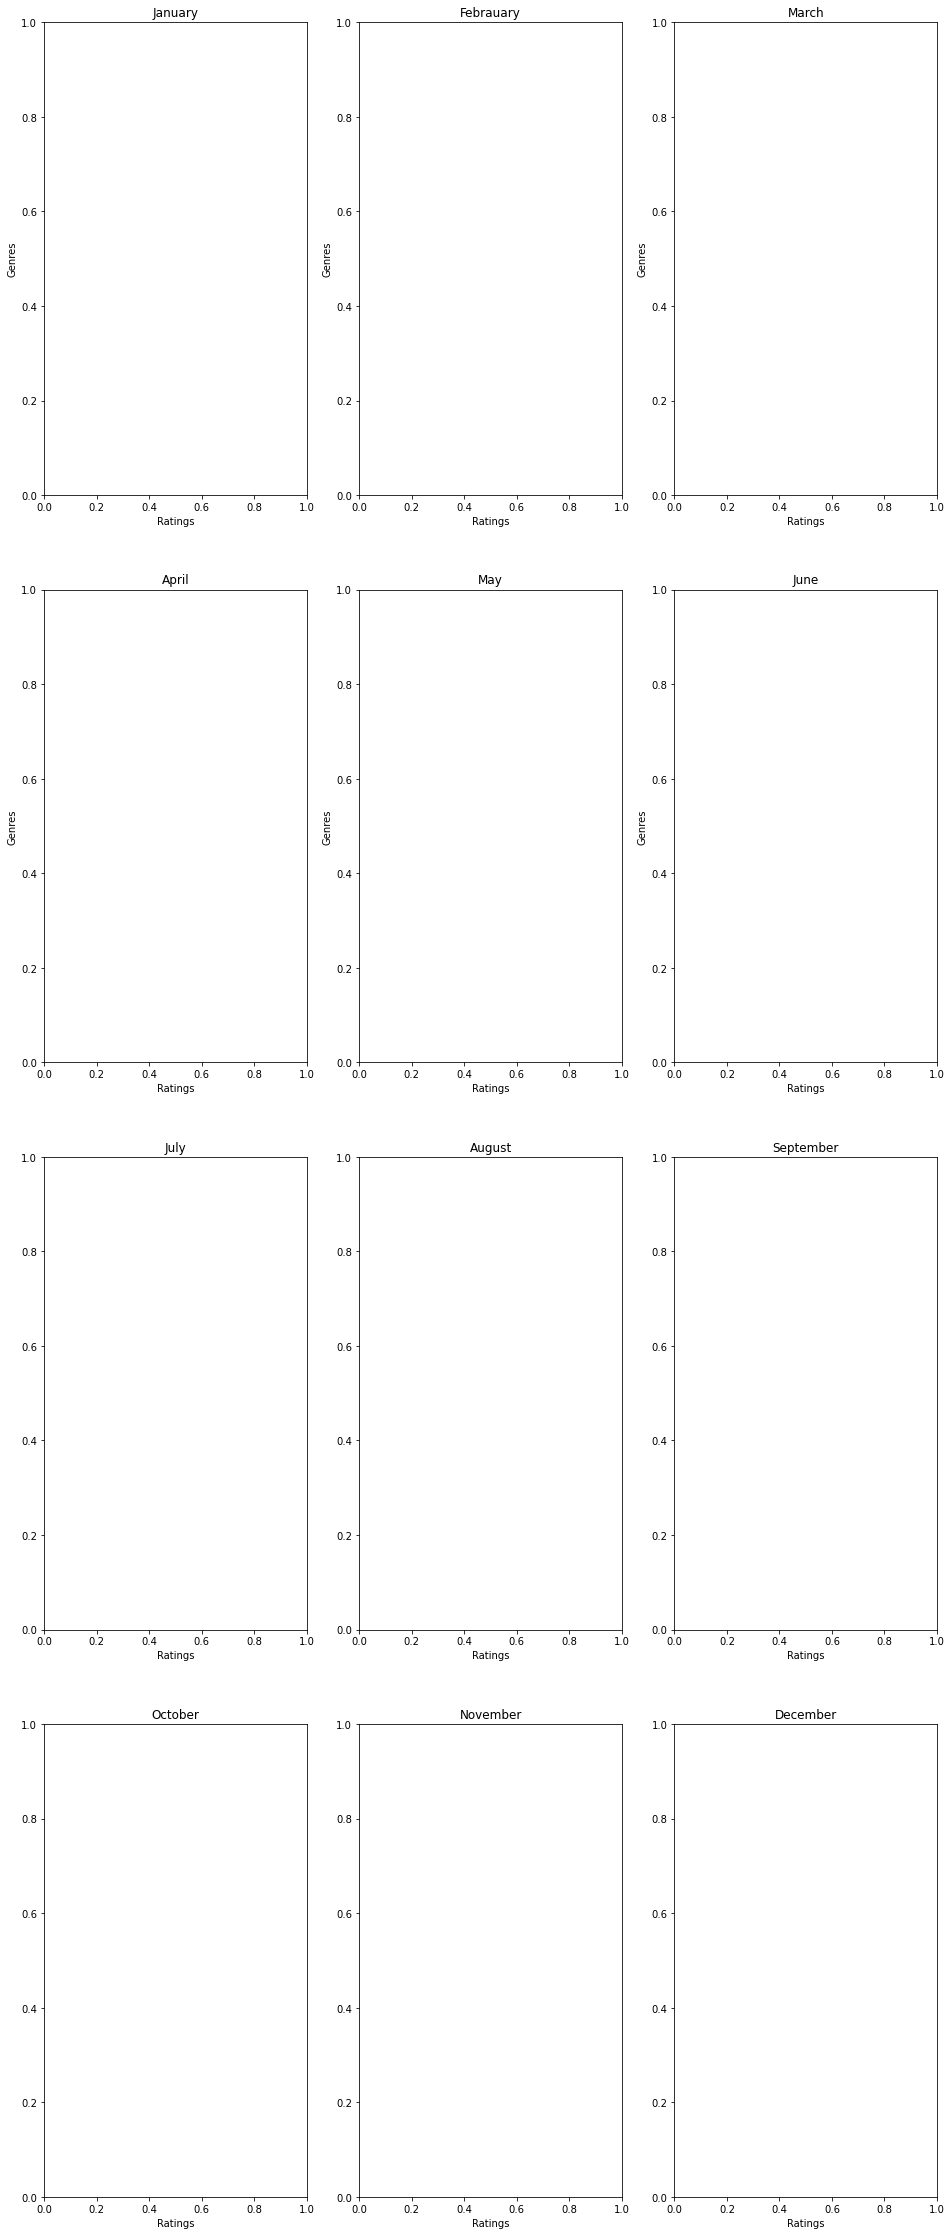

In [114]:
# fig , axes = plt.subplots(4,3, figsize = (16,40))

# axes[0][0].set_title('January')
# axes[0][1].set_title('Febrauary')
# axes[0][2].set_title('March')
# axes[1][0].set_title('April')
# axes[1][1].set_title('May')
# axes[1][2].set_title('June')
# axes[2][0].set_title('July')
# axes[2][1].set_title('August')
# axes[2][2].set_title('September')
# axes[3][0].set_title('October')
# axes[3][1].set_title('November')
# axes[3][2].set_title('December')

# axes[0][0].set_xlabel('Ratings')
# axes[0][1].set_xlabel('Ratings')
# axes[0][2].set_xlabel('Ratings')
# axes[1][0].set_xlabel('Ratings')
# axes[1][1].set_xlabel('Ratings')
# axes[1][2].set_xlabel('Ratings')
# axes[2][0].set_xlabel('Ratings')
# axes[2][1].set_xlabel('Ratings')
# axes[2][2].set_xlabel('Ratings')
# axes[3][0].set_xlabel('Ratings')
# axes[3][1].set_xlabel('Ratings')
# axes[3][2].set_xlabel('Ratings')

# axes[0][0].set_ylabel('Genres')
# axes[0][1].set_ylabel('Genres')
# axes[0][2].set_ylabel('Genres')
# axes[1][0].set_ylabel('Genres')
# axes[1][1].set_ylabel('Genres')
# axes[1][2].set_ylabel('Genres')

# x = month_genre_popularity.index
# Jan = month_genre_popularity[1]
# Feb = month_genre_popularity[2]
# Mar = month_genre_popularity[3]
# Apr = month_genre_popularity[4]
# May = month_genre_popularity[5]
# June = month_genre_popularity[6]
# July = month_genre_popularity[7]
# Aug = month_genre_popularity[8]
# Sep = month_genre_popularity[9]
# Oct = month_genre_popularity[10]
# Nov = month_genre_popularity[11]
# Dec = month_genre_popularity[12]

# axes[0][0].barh(x, Jan, color = 'gray')
# axes[0][1].barh(x, Feb, color = 'red')
# axes[0][2].barh(x, Mar, color = 'orange')
# axes[1][0].barh(x, Apr, color = 'green')
# axes[1][1].barh(x, May, color = 'pink')
# axes[1][2].barh(x, June, color = 'dodgerblue')
# axes[2][0].barh(x, July, color = 'black')
# axes[2][1].barh(x, Aug, color = 'purple')
# axes[2][2].barh(x, Sep, color = 'yellow')
# axes[3][0].barh(x, Oct, color = 'lime')
# axes[3][1].barh(x, Nov, color = 'brown')
# axes[3][2].barh(x, Dec, color = 'silver')

# # axes.tick_params(labelrotation=45)
# for tick in axes.get_xticklabels():
#     tick.set_rotation(45)

In [115]:
month_genre_rating.index

MultiIndex([( 1,          'Action'),
            ( 1,       'Adventure'),
            ( 1,          'Comedy'),
            ( 1,           'Crime'),
            ( 1,           'Drama'),
            ( 1,         'History'),
            ( 1,          'Horror'),
            ( 1,           'Music'),
            ( 1,         'Mystery'),
            ( 1,         'Romance'),
            ...
            (12,         'Fantasy'),
            (12,         'History'),
            (12,          'Horror'),
            (12,           'Music'),
            (12,         'Mystery'),
            (12,         'Romance'),
            (12, 'Science Fiction'),
            (12,        'Thriller'),
            (12,             'War'),
            (12,         'Western')],
           names=['month', 'genre_ids'], length=199)

In [59]:
month_genre_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Action to Western
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       14 non-null     float64
 1   2       17 non-null     float64
 2   3       17 non-null     float64
 3   4       17 non-null     float64
 4   5       17 non-null     float64
 5   6       17 non-null     float64
 6   7       17 non-null     float64
 7   8       16 non-null     float64
 8   9       17 non-null     float64
 9   10      16 non-null     float64
 10  11      17 non-null     float64
 11  12      17 non-null     float64
dtypes: float64(12)
memory usage: 1.7+ KB


# GRAPH
## graph
### graph

<BarContainer object of 17 artists>

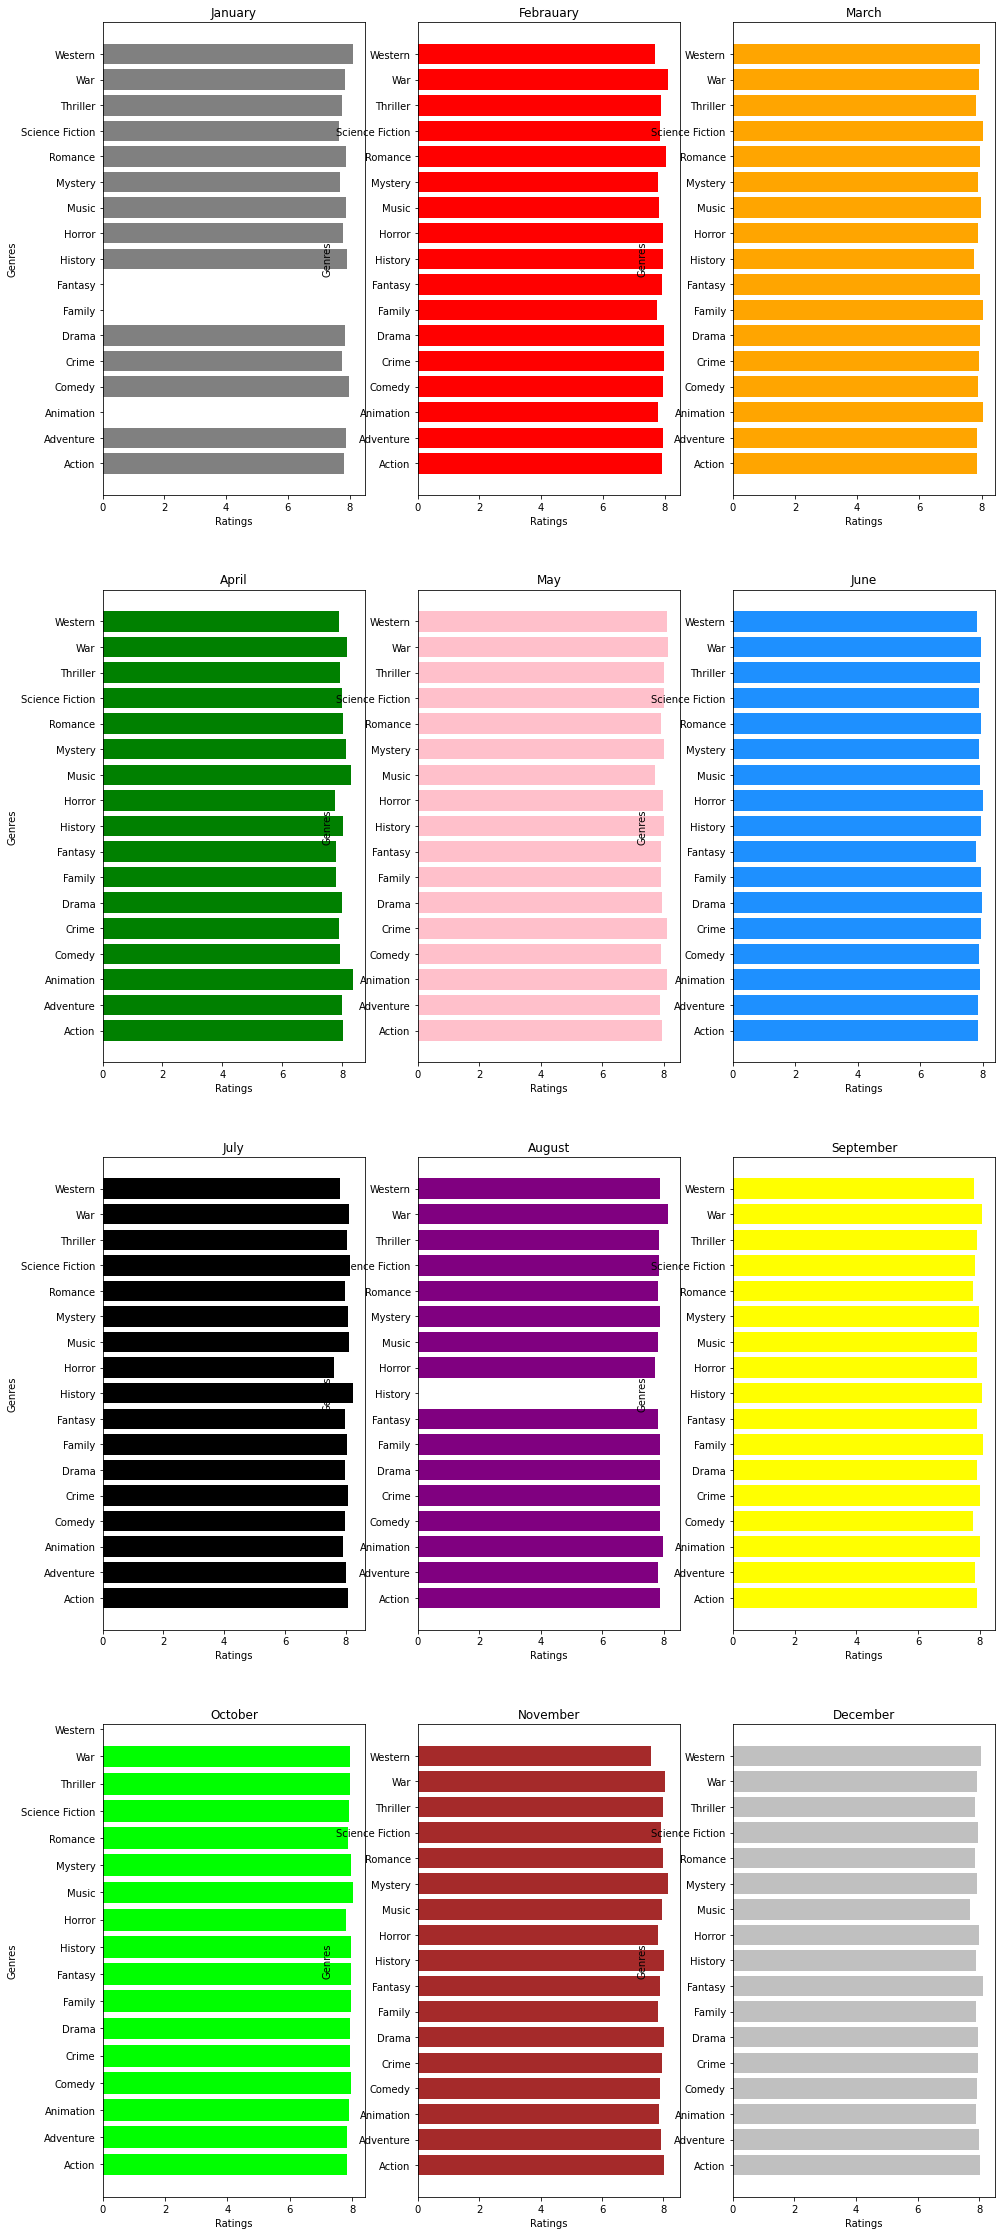

In [60]:
fig , axes = plt.subplots(4,3, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[0][2].set_title('March')
axes[1][0].set_title('April')
axes[1][1].set_title('May')
axes[1][2].set_title('June')
axes[2][0].set_title('July')
axes[2][1].set_title('August')
axes[2][2].set_title('September')
axes[3][0].set_title('October')
axes[3][1].set_title('November')
axes[3][2].set_title('December')

axes[0][0].set_xlabel('Ratings')
axes[0][1].set_xlabel('Ratings')
axes[0][2].set_xlabel('Ratings')
axes[1][0].set_xlabel('Ratings')
axes[1][1].set_xlabel('Ratings')
axes[1][2].set_xlabel('Ratings')
axes[2][0].set_xlabel('Ratings')
axes[2][1].set_xlabel('Ratings')
axes[2][2].set_xlabel('Ratings')
axes[3][0].set_xlabel('Ratings')
axes[3][1].set_xlabel('Ratings')
axes[3][2].set_xlabel('Ratings')

axes[0][0].set_ylabel('Genres')
axes[0][1].set_ylabel('Genres')
axes[0][2].set_ylabel('Genres')
axes[1][0].set_ylabel('Genres')
axes[1][1].set_ylabel('Genres')
axes[1][2].set_ylabel('Genres')
axes[2][0].set_ylabel('Genres')
axes[2][1].set_ylabel('Genres')
axes[2][2].set_ylabel('Genres')
axes[3][0].set_ylabel('Genres')
axes[3][1].set_ylabel('Genres')
axes[3][2].set_ylabel('Genres')

x = month_genre_rating.index
Jan = month_genre_rating[1]
Feb = month_genre_rating[2]
Mar = month_genre_rating[3]
Apr = month_genre_rating[4]
May = month_genre_rating[5]
June = month_genre_rating[6]
July = month_genre_rating[7]
Aug = month_genre_rating[8]
Sep = month_genre_rating[9]
Oct = month_genre_rating[10]
Nov = month_genre_rating[11]
Dec = month_genre_rating[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[0][2].barh(x, Mar, color = 'orange')
axes[1][0].barh(x, Apr, color = 'green')
axes[1][1].barh(x, May, color = 'pink')
axes[1][2].barh(x, June, color = 'dodgerblue')
axes[2][0].barh(x, July, color = 'black')
axes[2][1].barh(x, Aug, color = 'purple')
axes[2][2].barh(x, Sep, color = 'yellow')
axes[3][0].barh(x, Oct, color = 'lime')
axes[3][1].barh(x, Nov, color = 'brown')
axes[3][2].barh(x, Dec, color = 'silver')

<BarContainer object of 17 artists>

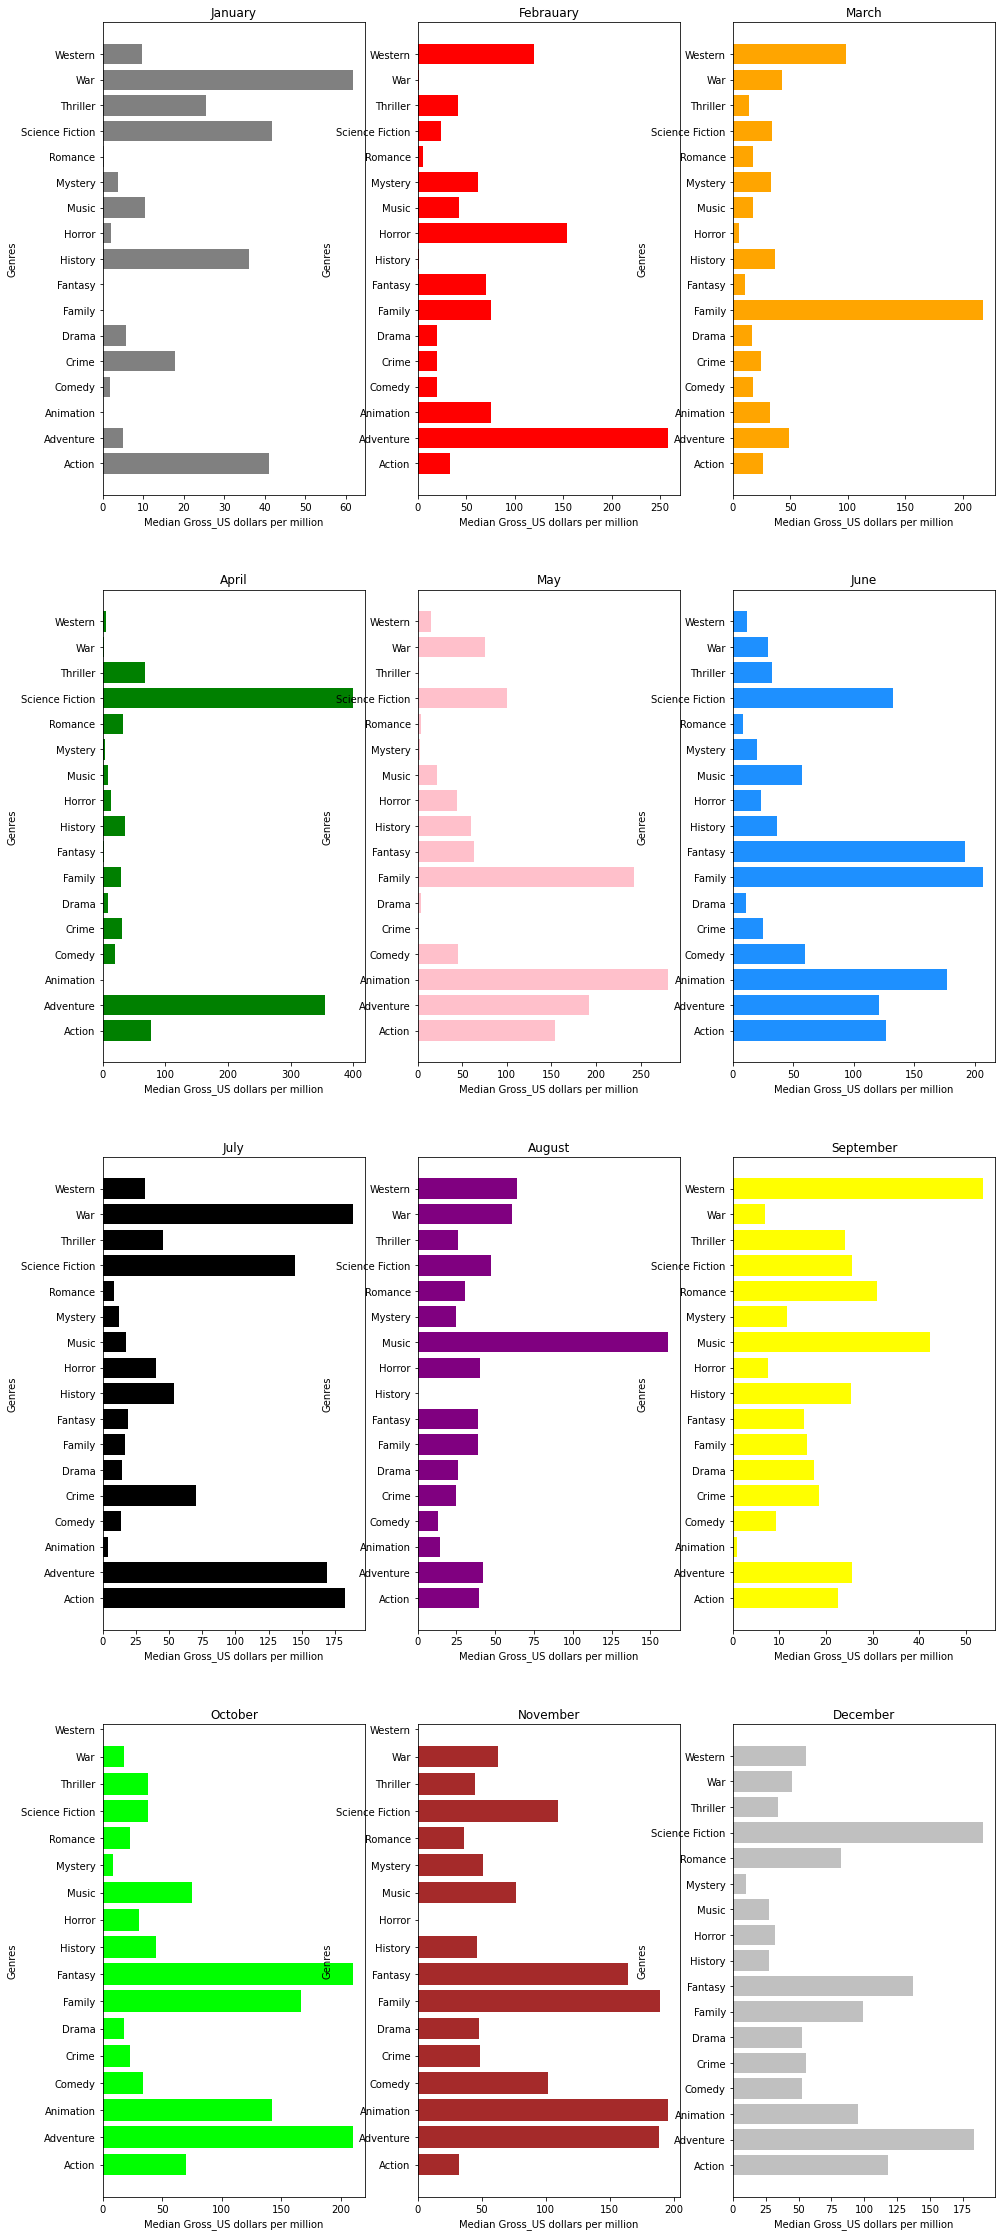

In [61]:
month_genre_gross_median = combo.groupby(['month', 'genre_ids'])['gross_us'].median().unstack().transpose()
fig , axes = plt.subplots(4,3, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[0][2].set_title('March')
axes[1][0].set_title('April')
axes[1][1].set_title('May')
axes[1][2].set_title('June')
axes[2][0].set_title('July')
axes[2][1].set_title('August')
axes[2][2].set_title('September')
axes[3][0].set_title('October')
axes[3][1].set_title('November')
axes[3][2].set_title('December')

axes[0][0].set_xlabel('Median Gross_US dollars per million')
axes[0][1].set_xlabel('Median Gross_US dollars per million')
axes[0][2].set_xlabel('Median Gross_US dollars per million')
axes[1][0].set_xlabel('Median Gross_US dollars per million')
axes[1][1].set_xlabel('Median Gross_US dollars per million')
axes[1][2].set_xlabel('Median Gross_US dollars per million')
axes[2][0].set_xlabel('Median Gross_US dollars per million')
axes[2][1].set_xlabel('Median Gross_US dollars per million')
axes[2][2].set_xlabel('Median Gross_US dollars per million')
axes[3][0].set_xlabel('Median Gross_US dollars per million')
axes[3][1].set_xlabel('Median Gross_US dollars per million')
axes[3][2].set_xlabel('Median Gross_US dollars per million')

axes[0][0].set_ylabel('Genres')
axes[0][1].set_ylabel('Genres')
axes[0][2].set_ylabel('Genres')
axes[1][0].set_ylabel('Genres')
axes[1][1].set_ylabel('Genres')
axes[1][2].set_ylabel('Genres')
axes[2][0].set_ylabel('Genres')
axes[2][1].set_ylabel('Genres')
axes[2][2].set_ylabel('Genres')
axes[3][0].set_ylabel('Genres')
axes[3][1].set_ylabel('Genres')
axes[3][2].set_ylabel('Genres')

x = month_genre_gross_median.index
Jan = month_genre_gross_median[1]
Feb = month_genre_gross_median[2]
Mar = month_genre_gross_median[3]
Apr = month_genre_gross_median[4]
May = month_genre_gross_median[5]
June = month_genre_gross_median[6]
July = month_genre_gross_median[7]
Aug = month_genre_gross_median[8]
Sep = month_genre_gross_median[9]
Oct = month_genre_gross_median[10]
Nov = month_genre_gross_median[11]
Dec = month_genre_gross_median[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[0][2].barh(x, Mar, color = 'orange')
axes[1][0].barh(x, Apr, color = 'green')
axes[1][1].barh(x, May, color = 'pink')
axes[1][2].barh(x, June, color = 'dodgerblue')
axes[2][0].barh(x, July, color = 'black')
axes[2][1].barh(x, Aug, color = 'purple')
axes[2][2].barh(x, Sep, color = 'yellow')
axes[3][0].barh(x, Oct, color = 'lime')
axes[3][1].barh(x, Nov, color = 'brown')
axes[3][2].barh(x, Dec, color = 'silver')

<BarContainer object of 17 artists>

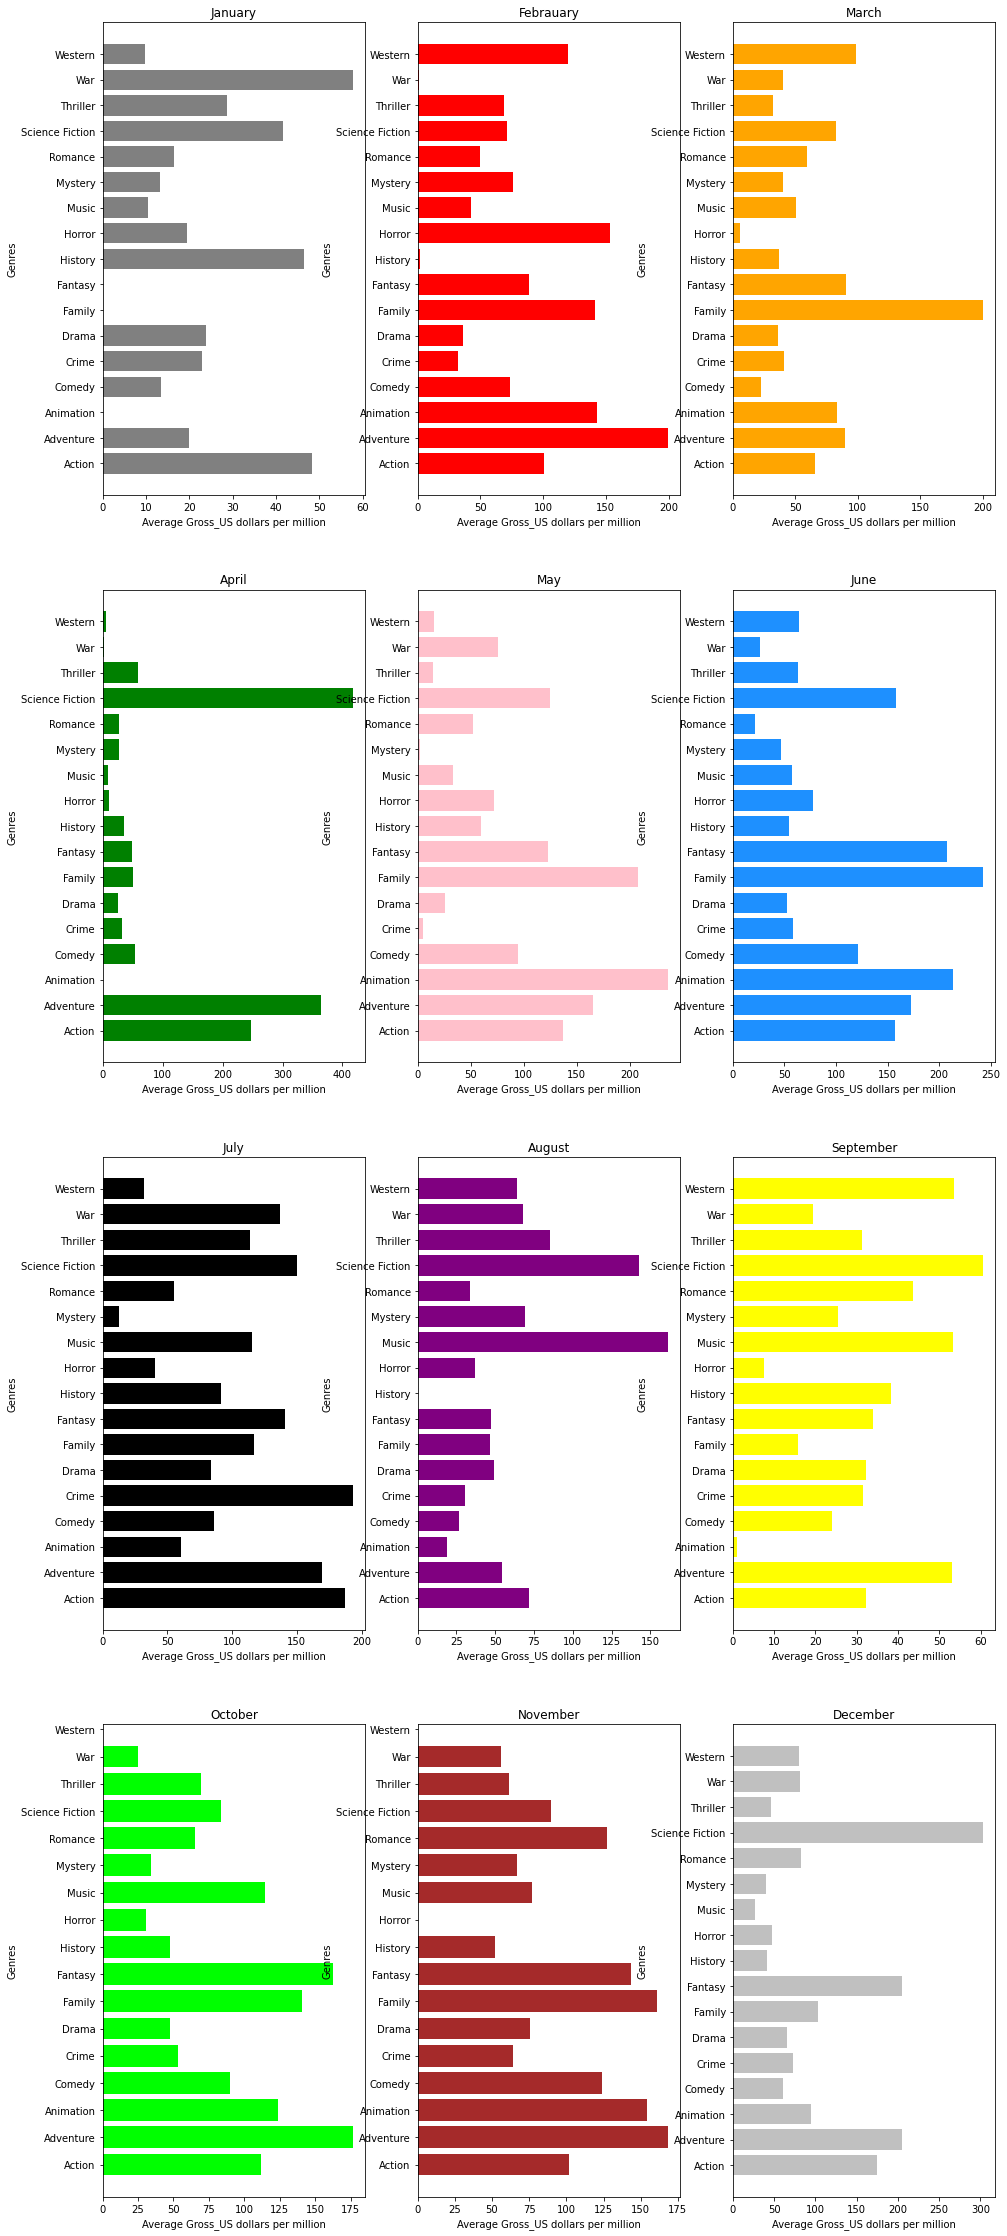

In [200]:
month_genre_gross_median = combo.groupby(['month', 'genre_ids'])['gross_us'].mean().unstack().transpose()
fig , axes = plt.subplots(4,3, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[0][2].set_title('March')
axes[1][0].set_title('April')
axes[1][1].set_title('May')
axes[1][2].set_title('June')
axes[2][0].set_title('July')
axes[2][1].set_title('August')
axes[2][2].set_title('September')
axes[3][0].set_title('October')
axes[3][1].set_title('November')
axes[3][2].set_title('December')

axes[0][0].set_xlabel('Average Gross_US dollars per million')
axes[0][1].set_xlabel('Average Gross_US dollars per million')
axes[0][2].set_xlabel('Average Gross_US dollars per million')
axes[1][0].set_xlabel('Average Gross_US dollars per million')
axes[1][1].set_xlabel('Average Gross_US dollars per million')
axes[1][2].set_xlabel('Average Gross_US dollars per million')
axes[2][0].set_xlabel('Average Gross_US dollars per million')
axes[2][1].set_xlabel('Average Gross_US dollars per million')
axes[2][2].set_xlabel('Average Gross_US dollars per million')
axes[3][0].set_xlabel('Average Gross_US dollars per million')
axes[3][1].set_xlabel('Average Gross_US dollars per million')
axes[3][2].set_xlabel('Average Gross_US dollars per million')

axes[0][0].set_ylabel('Genres')
axes[0][1].set_ylabel('Genres')
axes[0][2].set_ylabel('Genres')
axes[1][0].set_ylabel('Genres')
axes[1][1].set_ylabel('Genres')
axes[1][2].set_ylabel('Genres')
axes[2][0].set_ylabel('Genres')
axes[2][1].set_ylabel('Genres')
axes[2][2].set_ylabel('Genres')
axes[3][0].set_ylabel('Genres')
axes[3][1].set_ylabel('Genres')
axes[3][2].set_ylabel('Genres')

x = month_genre_gross_median.index
Jan = month_genre_gross_median[1]
Feb = month_genre_gross_median[2]
Mar = month_genre_gross_median[3]
Apr = month_genre_gross_median[4]
May = month_genre_gross_median[5]
June = month_genre_gross_median[6]
July = month_genre_gross_median[7]
Aug = month_genre_gross_median[8]
Sep = month_genre_gross_median[9]
Oct = month_genre_gross_median[10]
Nov = month_genre_gross_median[11]
Dec = month_genre_gross_median[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[0][2].barh(x, Mar, color = 'orange')
axes[1][0].barh(x, Apr, color = 'green')
axes[1][1].barh(x, May, color = 'pink')
axes[1][2].barh(x, June, color = 'dodgerblue')
axes[2][0].barh(x, July, color = 'black')
axes[2][1].barh(x, Aug, color = 'purple')
axes[2][2].barh(x, Sep, color = 'yellow')
axes[3][0].barh(x, Oct, color = 'lime')
axes[3][1].barh(x, Nov, color = 'brown')
axes[3][2].barh(x, Dec, color = 'silver')

List of things for thurs:
    figure out how to scale graphs,
    assign colors to genre as oppose to month
   

<BarContainer object of 17 artists>

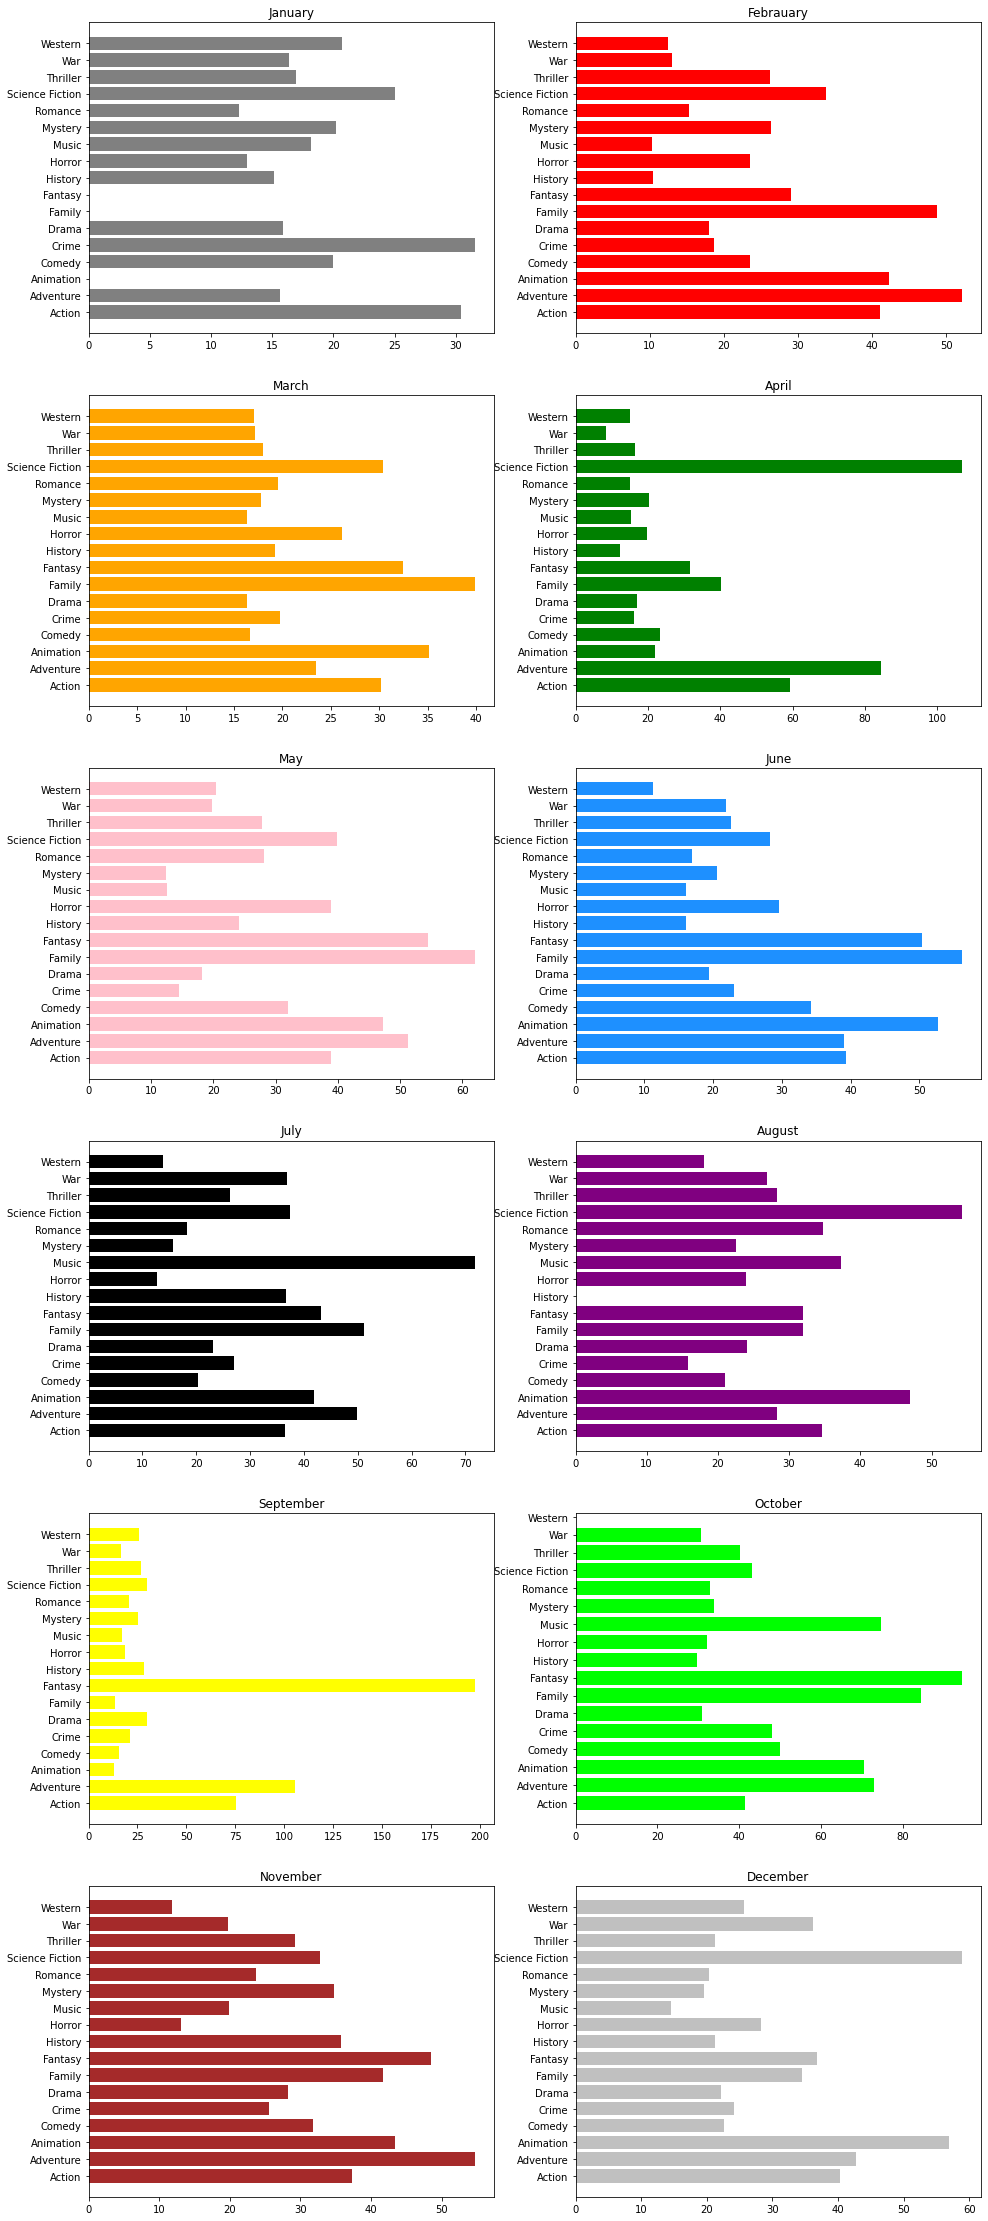

In [68]:
fig , axes = plt.subplots(6,2, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[1][0].set_title('March')
axes[1][1].set_title('April')
axes[2][0].set_title('May')
axes[2][1].set_title('June')
axes[3][0].set_title('July')
axes[3][1].set_title('August')
axes[4][0].set_title('September')
axes[4][1].set_title('October')
axes[5][0].set_title('November')
axes[5][1].set_title('December')

# axes[0][0].set_xlabel('Ratings')
# axes[0][1].set_xlabel('Ratings')
# axes[0][2].set_xlabel('Ratings')
# axes[1][0].set_xlabel('Ratings')
# axes[1][1].set_xlabel('Ratings')
# axes[1][2].set_xlabel('Ratings')
# axes[2][0].set_xlabel('Ratings')
# axes[2][1].set_xlabel('Ratings')
# axes[2][2].set_xlabel('Ratings')
# axes[3][0].set_xlabel('Ratings')
# axes[3][1].set_xlabel('Ratings')
# axes[3][2].set_xlabel('Ratings')

# axes[0][0].set_ylabel('Genres')
# axes[0][1].set_ylabel('Genres')
# axes[0][2].set_ylabel('Genres')
# axes[1][0].set_ylabel('Genres')
# axes[1][1].set_ylabel('Genres')
# axes[1][2].set_ylabel('Genres')

x = month_genre_popularity.index
Jan = month_genre_popularity[1]
Feb = month_genre_popularity[2]
Mar = month_genre_popularity[3]
Apr = month_genre_popularity[4]
May = month_genre_popularity[5]
June = month_genre_popularity[6]
July = month_genre_popularity[7]
Aug = month_genre_popularity[8]
Sep = month_genre_popularity[9]
Oct = month_genre_popularity[10]
Nov = month_genre_popularity[11]
Dec = month_genre_popularity[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[1][0].barh(x, Mar, color = 'orange')
axes[1][1].barh(x, Apr, color = 'green')
axes[2][0].barh(x, May, color = 'pink')
axes[2][1].barh(x, June, color = 'dodgerblue')
axes[3][0].barh(x, July, color = 'black')
axes[3][1].barh(x, Aug, color = 'purple')
axes[4][0].barh(x, Sep, color = 'yellow')
axes[4][1].barh(x, Oct, color = 'lime')
axes[5][0].barh(x, Nov, color = 'brown')
axes[5][1].barh(x, Dec, color = 'silver')

In [ ]:
#line
fig , axes = plt.subplots(6,2, figsize = (16,7))

x = month_genre_rating.index
Jan = month_genre_rating[1]
Feb = month_genre_rating[2]
Mar = month_genre_rating[3]
Apr = month_genre_rating[4]
May = month_genre_rating[5]
June = month_genre_rating[6]
July = month_genre_rating[7]
Aug = month_genre_rating[8]
Sep = month_genre_rating[9]
Oct = month_genre_rating[10]
Nov = month_genre_rating[11]
Dec = month_genre_rating[12]

In [69]:
#same genre on one graph - y: month, x:rating

In [71]:
len(genre)

19

In [83]:
month_genre_rating.transpose()

genre_ids,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,7.814286,7.900000,NaN,7.972727,7.750000,7.866667,NaN,NaN,7.916667,7.800000,7.900000,7.700000,7.887500,7.650000,7.750000,7.860000,8.100000
2,7.922222,7.960000,7.783333,7.945455,7.975000,7.973171,7.760000,7.900000,7.950000,7.942857,7.800000,7.785714,8.050000,7.833333,7.870588,8.100000,7.700000
3,7.850000,7.858333,8.033333,7.876923,7.911765,7.932500,8.033333,7.940000,7.766667,7.866667,7.975000,7.885714,7.960000,8.037500,7.823810,7.920000,7.933333
4,8.035294,7.981818,8.350000,7.921429,7.900000,7.992593,7.800000,7.800000,8.033333,7.766667,8.300000,8.120000,8.016667,8.000000,7.918182,8.150000,7.900000
5,7.940000,7.894444,8.100000,7.917647,8.100000,7.934884,7.900000,7.900000,8.000000,7.966667,7.733333,8.000000,7.907143,8.011111,8.000000,8.133333,8.100000
6,7.835714,7.835000,7.912500,7.872000,7.928571,7.968333,7.925000,7.790000,7.950000,8.000000,7.900000,7.866667,7.933333,7.891667,7.908696,7.950000,7.800000
7,8.066667,8.016667,7.916667,7.963158,8.077778,7.966667,8.027273,7.984615,8.225000,7.600000,8.100000,8.066667,7.963636,8.150000,8.047368,8.100000,7.800000
8,7.861538,7.808333,7.980000,7.870000,7.881250,7.885714,7.887500,7.800000,NaN,7.700000,7.800000,7.876923,7.820000,7.833333,7.845833,8.125000,7.866667
9,7.894118,7.836364,8.000000,7.784211,7.993103,7.905435,8.100000,7.900000,8.069231,7.900000,7.900000,7.966667,7.790000,7.857143,7.910000,8.066667,7.800000


month  genre_ids      
1      Action             7.80
       Adventure          7.80
       Comedy             8.10
       Crime              7.80
       Drama              7.80
                          ... 
12     Romance            7.90
       Science Fiction    7.80
       Thriller           7.80
       War                7.95
       Western            7.90
Name: imdb_rating, Length: 199, dtype: float64

<BarContainer object of 17 artists>

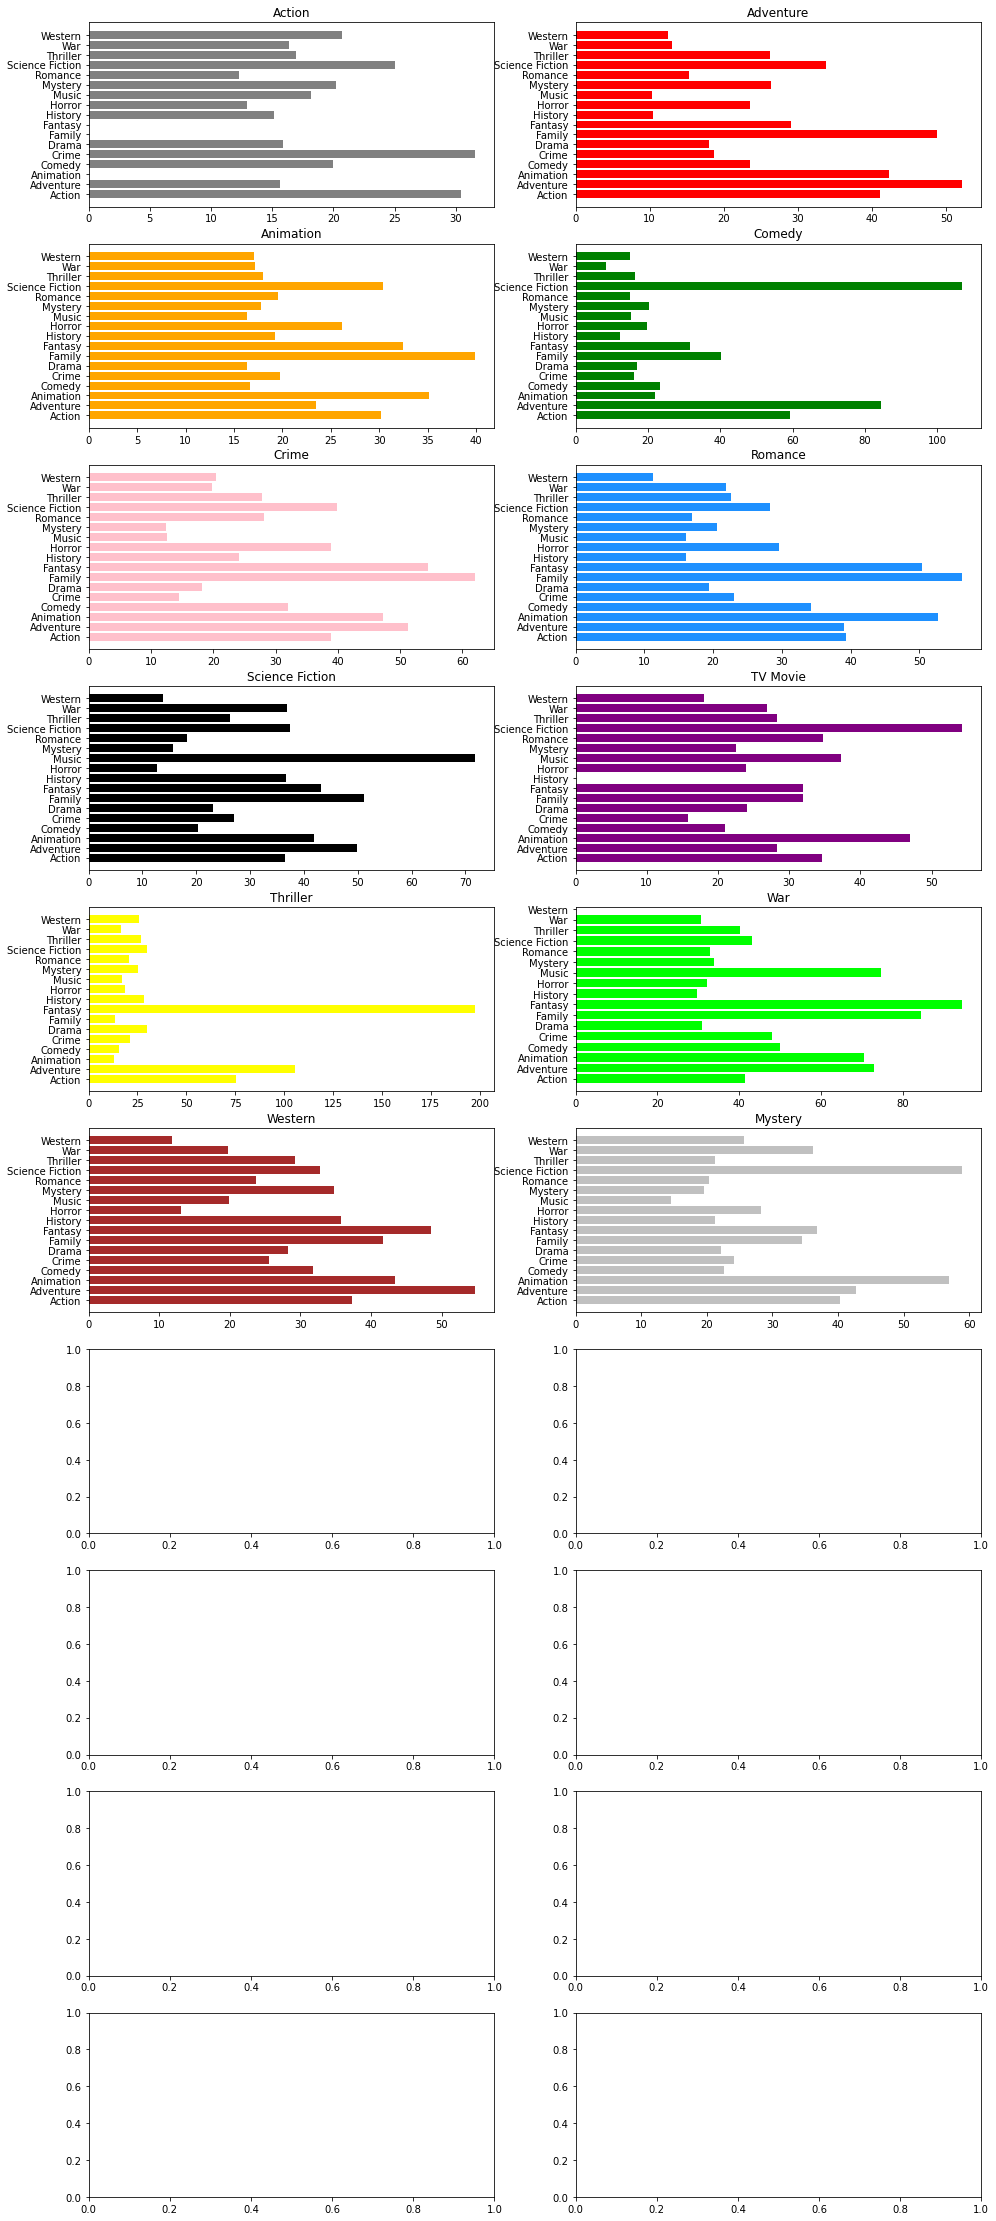

In [72]:
fig , axes = plt.subplots(10,2, figsize = (16,40))

axes[0][0].set_title('Action')
axes[0][1].set_title('Adventure')
axes[1][0].set_title('Animation')
axes[1][1].set_title('Comedy')
axes[2][0].set_title('Crime')
axes[2][1].set_title('Documentary')
axes[3][0].set_title('Drama')
axes[3][1].set_title('Family')
axes[4][0].set_title('Fantasy')
axes[4][1].set_title('History')
axes[5][0].set_title('Music')
axes[5][1].set_title('Mystery')
axes[6][0].set_title('Romance')
axes[6][1].set_title('Science Fiction')
axes[7][0].set_title('TV Movie')
axes[7][1].set_title('Thriller')
axes[8][0].set_title('War')
axes[8][1].set_title('Western')

axes[0][0].set_xlabel('Ratings')
axes[0][1].set_xlabel('Ratings')
axes[1][0].set_xlabel('Ratings')
axes[1][1].set_xlabel('Ratings')
axes[2][0].set_xlabel('Ratings')
axes[2][1].set_xlabel('Ratings')
axes[3][0].set_xlabel('Ratings')
axes[3][1].set_xlabel('Ratings')
axes[4][0].set_xlabel('Ratings')
axes[4][1].set_xlabel('Ratings')
axes[5][0].set_xlabel('Ratings')
axes[5][1].set_xlabel('Ratings')
axes[6][0].set_xlabel('Ratings')
axes[6][1].set_xlabel('Ratings')
axes[7][0].set_xlabel('Ratings')
axes[7][1].set_xlabel('Ratings')
axes[8][0].set_xlabel('Ratings')
axes[8][1].set_xlabel('Ratings')

axes[0][0].set_ylabel('Month')
axes[0][1].set_ylabel('Month')
axes[1][0].set_ylabel('Month')
axes[1][1].set_ylabel('Month')
axes[2][0].set_ylabel('Month')
axes[2][1].set_ylabel('Month')
axes[3][0].set_ylabel('Month')
axes[3][1].set_ylabel('Month')
axes[4][0].set_ylabel('Month')
axes[4][1].set_ylabel('Month')
axes[5][0].set_ylabel('Month')
axes[5][1].set_ylabel('Month')
axes[6][0].set_ylabel('Month')
axes[6][1].set_ylabel('Month')
axes[7][0].set_ylabel('Month')
axes[7][1].set_ylabel('Month')
axes[8][0].set_ylabel('Month')
axes[8][1].set_ylabel('Month')

y = month_genre_rating.index
month_genre_rating['Action']
month_genre_rating['Adventure']
month_genre_rating['Animation']
month_genre_rating['Comedy']
month_genre_rating['Crime']
month_genre_rating['Documentary']
month_genre_rating['Drama']
month_genre_rating['Family']
month_genre_rating['Fantasy']
month_genre_rating['History']
month_genre_rating['Music']
month_genre_rating['Mystery']
month_genre_rating['Romance'
month_genre_rating['Science Fiction']
month_genre_rating['TV Movie']
month_genre_rating['Thriller']
month_genre_rating['War']
month_genre_rating['Western']

axes[0][0].barh(x, y, color = 'gray')
axes[0][1].barh(x, y, color = 'red')
axes[1][0].barh(x, y, color = 'orange')
axes[1][1].barh(x, y, color = 'green')
axes[2][0].barh(x, y, color = 'pink')
axes[2][1].barh(x, y, color = 'dodgerblue')
axes[3][0].barh(x, y, color = 'black')
axes[3][1].barh(x, y, color = 'purple')
axes[4][0].barh(x, y, color = 'yellow')
axes[4][1].barh(x, y, color = 'lime')
axes[5][0].barh(x, y, color = 'brown')
axes[5][1].barh(x, y, color = 'silver')

In [125]:
data = month_genre_rating.transpose()

In [126]:
data

genre_ids,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,7.814286,7.900000,NaN,7.972727,7.750000,7.866667,NaN,NaN,7.916667,7.800000,7.900000,7.700000,7.887500,7.650000,7.750000,7.860000,8.100000
2,7.922222,7.960000,7.783333,7.945455,7.975000,7.973171,7.760000,7.900000,7.950000,7.942857,7.800000,7.785714,8.050000,7.833333,7.870588,8.100000,7.700000
3,7.850000,7.858333,8.033333,7.876923,7.911765,7.932500,8.033333,7.940000,7.766667,7.866667,7.975000,7.885714,7.960000,8.037500,7.823810,7.920000,7.933333
4,8.035294,7.981818,8.350000,7.921429,7.900000,7.992593,7.800000,7.800000,8.033333,7.766667,8.300000,8.120000,8.016667,8.000000,7.918182,8.150000,7.900000
5,7.940000,7.894444,8.100000,7.917647,8.100000,7.934884,7.900000,7.900000,8.000000,7.966667,7.733333,8.000000,7.907143,8.011111,8.000000,8.133333,8.100000
6,7.835714,7.835000,7.912500,7.872000,7.928571,7.968333,7.925000,7.790000,7.950000,8.000000,7.900000,7.866667,7.933333,7.891667,7.908696,7.950000,7.800000
7,8.066667,8.016667,7.916667,7.963158,8.077778,7.966667,8.027273,7.984615,8.225000,7.600000,8.100000,8.066667,7.963636,8.150000,8.047368,8.100000,7.800000
8,7.861538,7.808333,7.980000,7.870000,7.881250,7.885714,7.887500,7.800000,NaN,7.700000,7.800000,7.876923,7.820000,7.833333,7.845833,8.125000,7.866667
9,7.894118,7.836364,8.000000,7.784211,7.993103,7.905435,8.100000,7.900000,8.069231,7.900000,7.900000,7.966667,7.790000,7.857143,7.910000,8.066667,7.800000


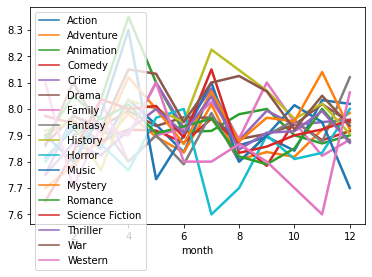

In [128]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5, dashes=False)

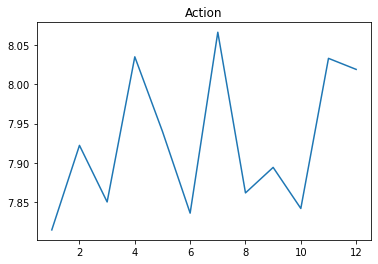

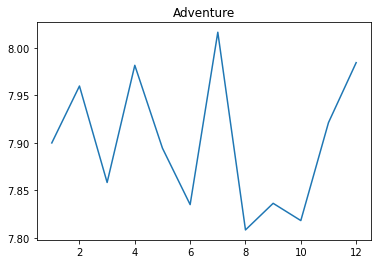

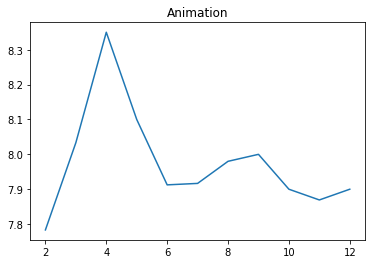

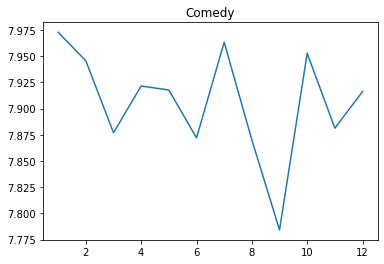

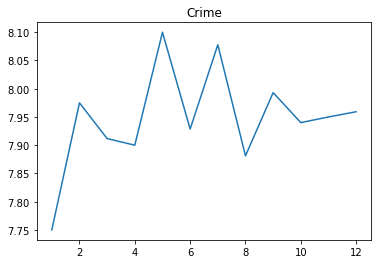

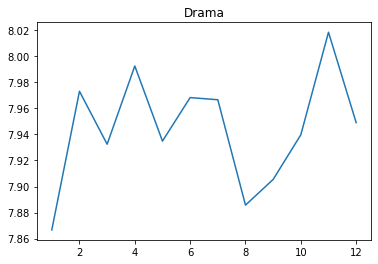

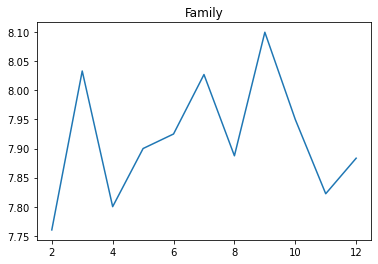

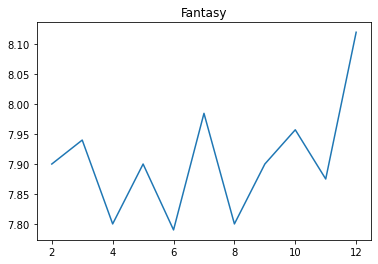

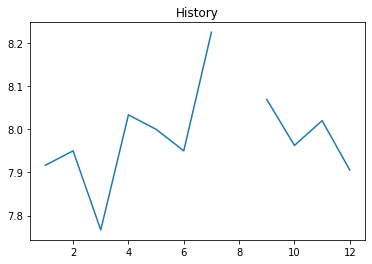

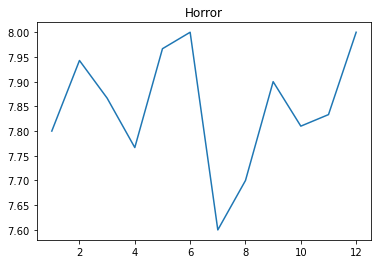

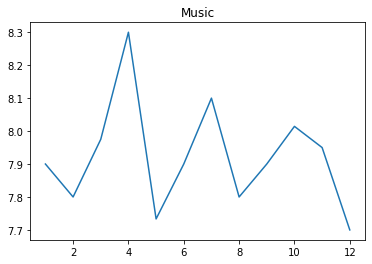

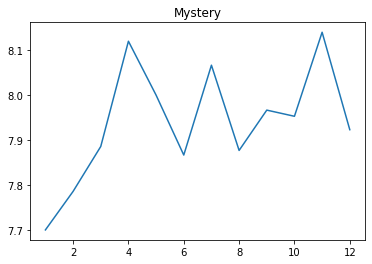

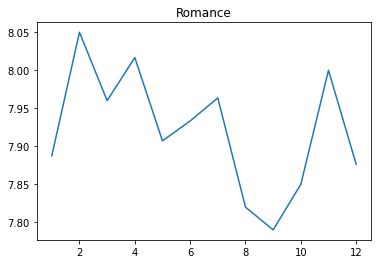

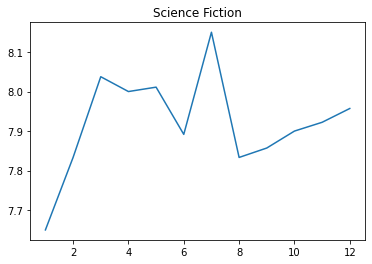

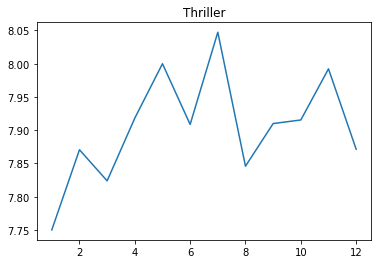

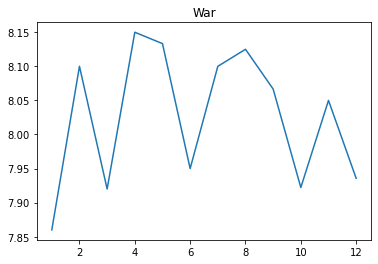

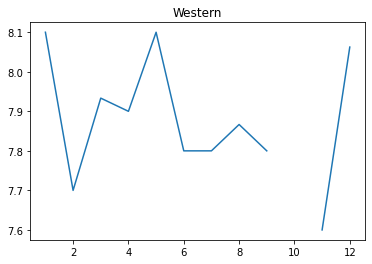

In [131]:
for col in data.columns:
    plt.plot(data.index, data[col].values)
    plt.title(col)
    plt.show()

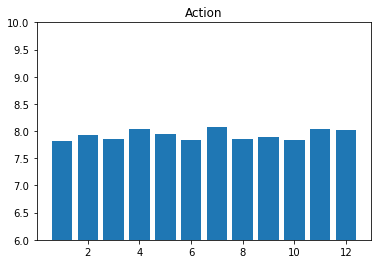

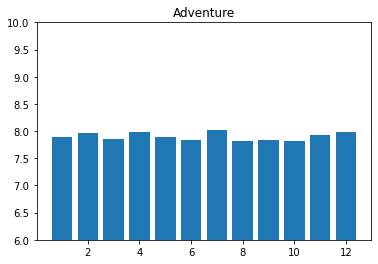

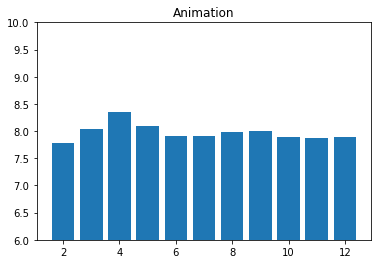

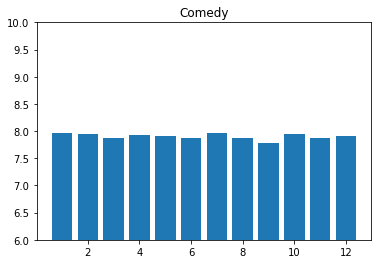

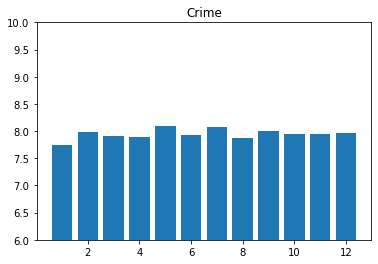

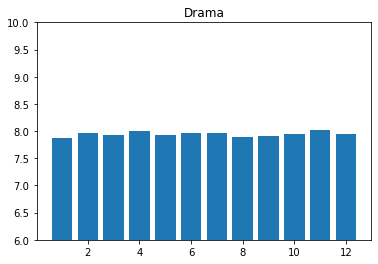

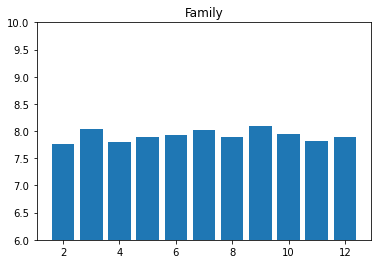

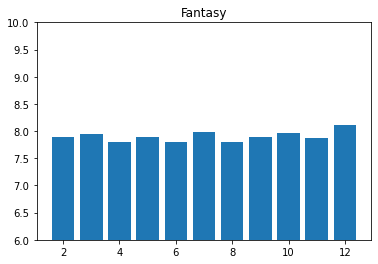

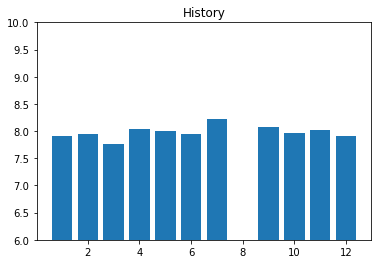

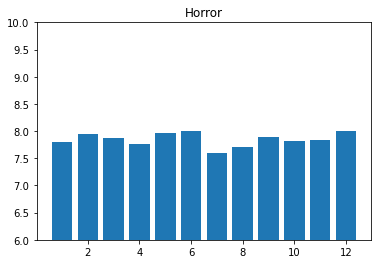

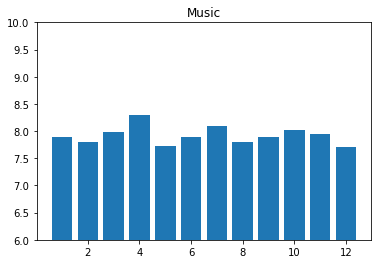

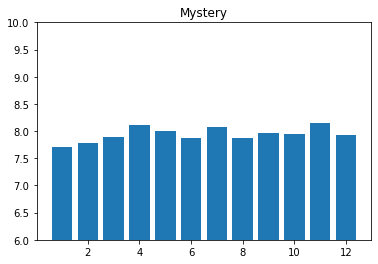

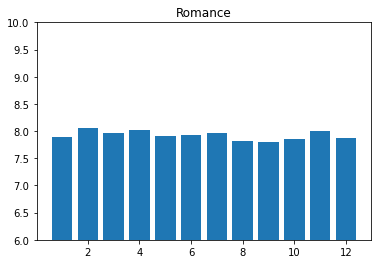

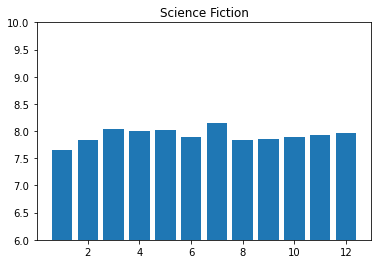

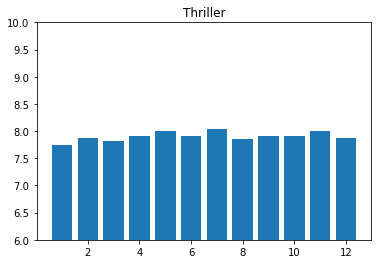

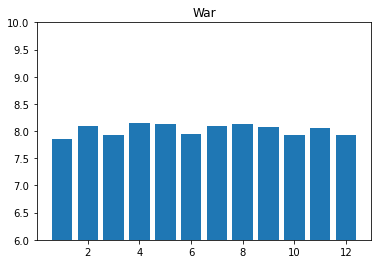

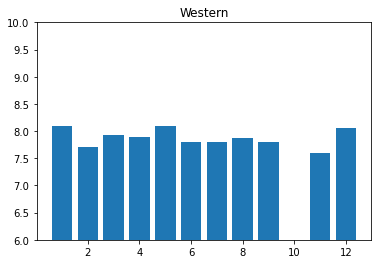

In [135]:
for col in data.columns:
    plt.bar(data.index, data[col].values)
    plt.ylim(6,10)
    plt.title(col)
    plt.show()

In [140]:
month_genre_gross_median = combo.groupby(['genre_ids','month'])['gross_us'].median().unstack().transpose()

In [141]:
month_genre_gross_median

genre_ids,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,41.000,5.010,NaN,1.830,17.915,5.740,NaN,NaN,36.080,2.12,10.46,3.800,0.420,41.690,25.510,61.700,9.755
2,33.400,257.760,75.290,19.520,19.800,19.520,75.290,70.710,1.865,153.39,42.77,62.505,5.820,23.890,41.910,1.110,119.500
3,26.585,48.615,32.020,17.500,24.610,16.290,217.580,10.630,36.400,5.51,17.22,33.080,17.815,34.400,13.790,42.690,98.375
4,77.910,354.110,1.110,19.170,30.335,8.110,28.610,1.790,35.310,13.54,8.82,4.420,33.230,398.945,68.405,1.720,4.910
5,154.060,192.440,280.335,45.510,1.040,4.040,242.510,63.540,59.790,44.02,22.00,2.265,4.040,100.210,1.920,75.600,15.000
6,126.865,120.620,177.000,59.365,24.750,10.850,206.450,191.725,36.875,22.89,57.23,20.300,8.690,132.070,32.000,28.700,12.060
7,182.305,169.345,3.795,13.780,70.175,14.390,17.145,19.200,53.710,40.46,18.01,12.590,8.645,145.000,45.240,188.370,31.800
8,39.400,42.070,14.090,13.120,24.380,26.020,38.630,38.630,NaN,40.46,161.20,24.380,30.500,47.130,26.020,60.550,64.010
9,22.505,25.510,0.930,9.295,18.385,17.420,15.860,15.320,25.295,7.55,42.25,11.535,30.860,25.510,24.150,6.860,53.610


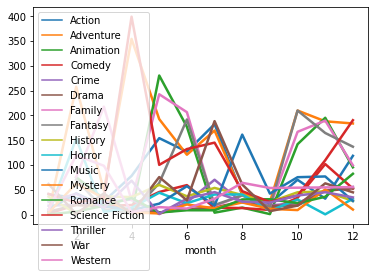

In [142]:
sns.lineplot(data=month_genre_gross_median, palette="tab10", linewidth=2.5, dashes=False)

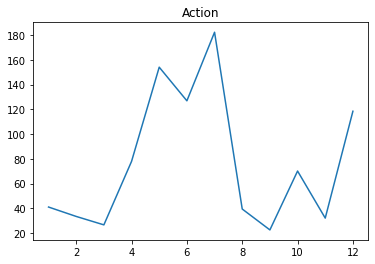

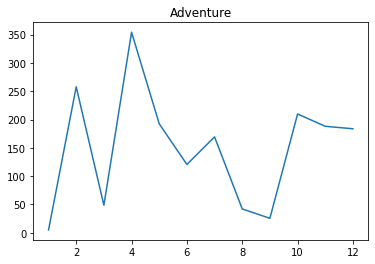

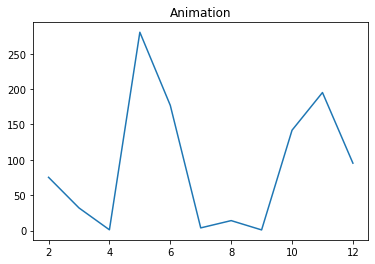

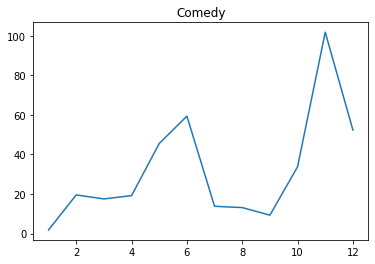

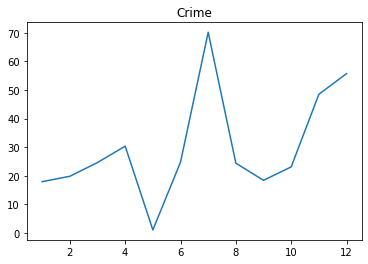

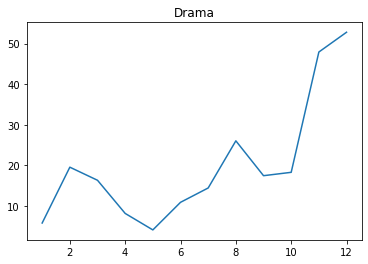

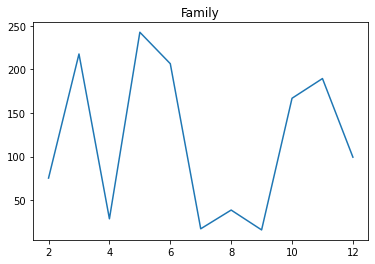

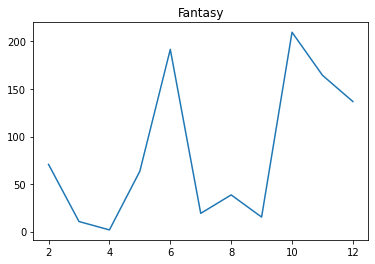

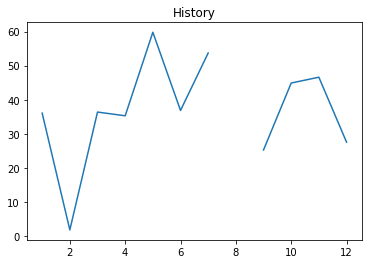

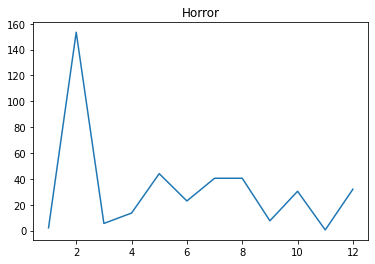

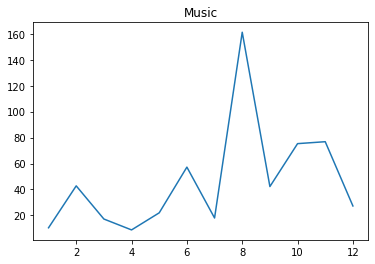

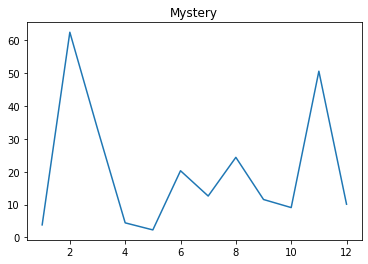

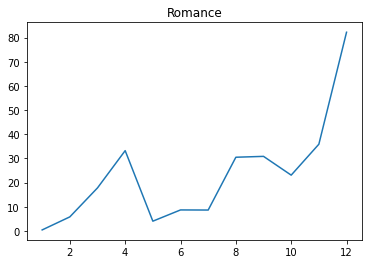

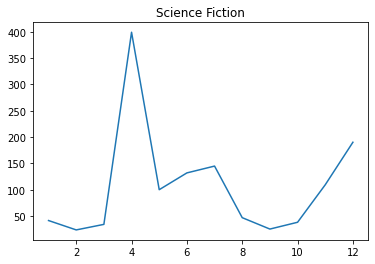

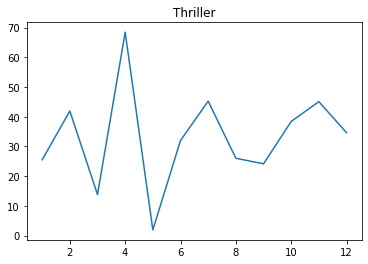

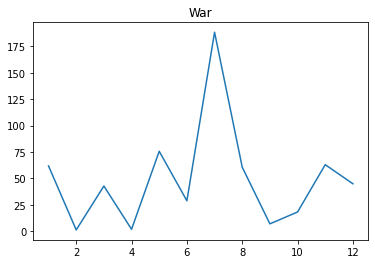

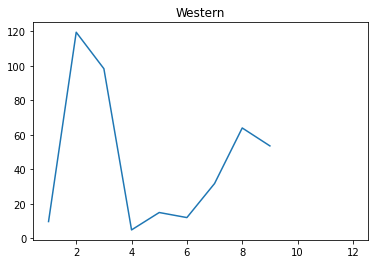

In [143]:
for col in month_genre_gross_median.columns:
    plt.plot(month_genre_gross_median.index, month_genre_gross_median[col].values)
    plt.title(col)
    plt.show()

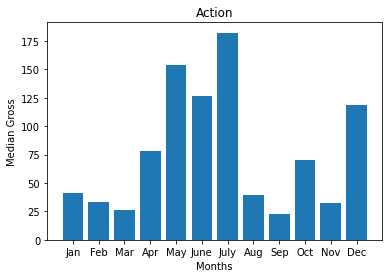

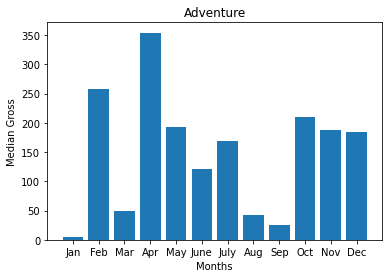

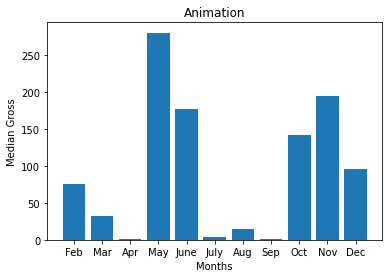

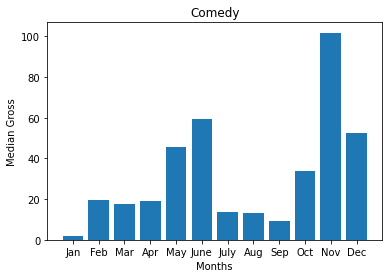

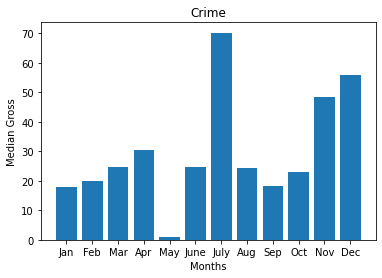

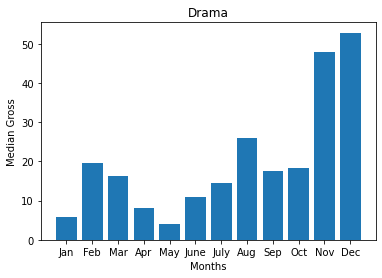

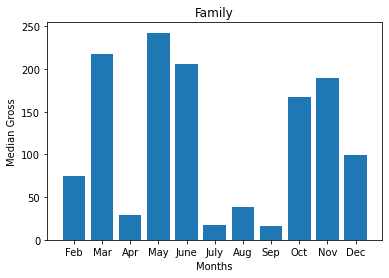

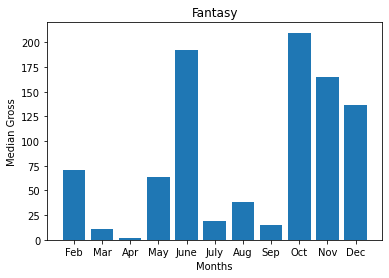

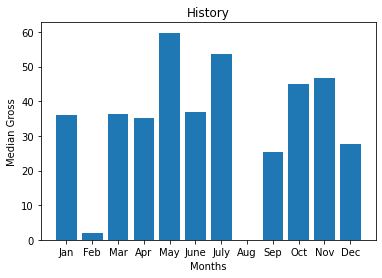

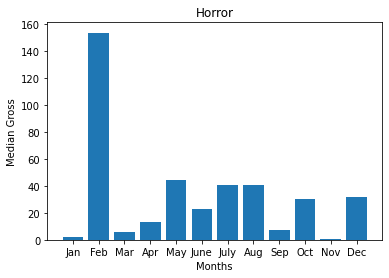

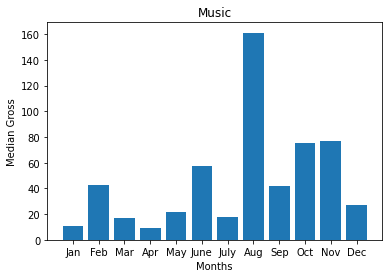

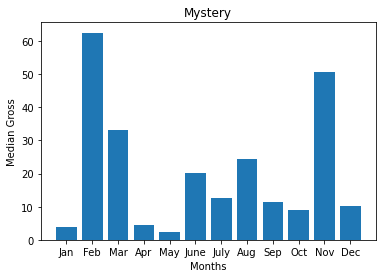

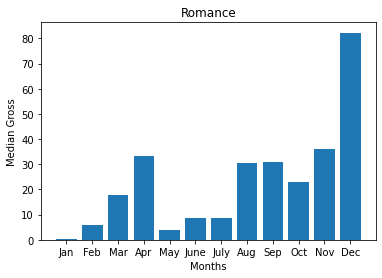

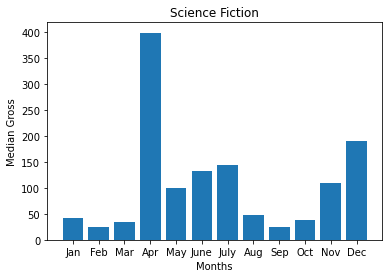

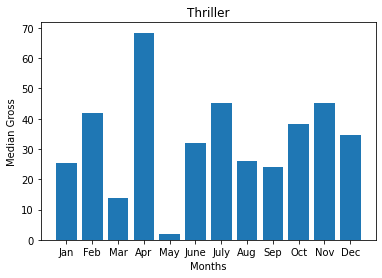

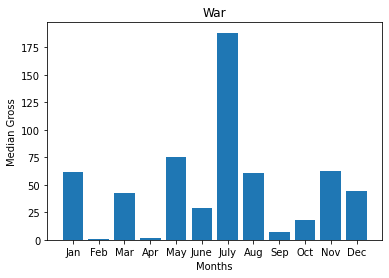

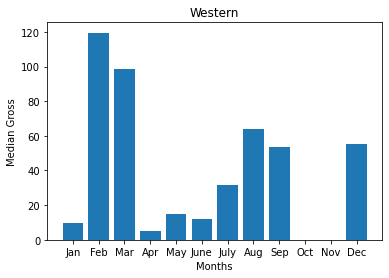

In [153]:
for col in month_genre_gross_median.columns:
    plt.bar(months, month_genre_gross_median[col].values)
    plt.title(col)
    plt.xlabel('Months')
    plt.ylabel('Median Gross')
    plt.show()

In [146]:
month_genre_gross_median.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [148]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [67]:
month_genre_gross_median = combined.groupby(['month', 'genres1'])['gross_us'].median().unstack()

In [68]:
month_genre_gross_median

genres1,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,0.030,5.010,NaN,2.200,45.870,21.120,NaN,NaN,NaN,2.12,NaN,NaN,NaN,57.940,NaN,NaN,14.500
2,70.510,257.760,57.580,8.845,34.580,16.500,NaN,109.510,NaN,NaN,NaN,95.21,70.910,33.400,1.080,NaN,119.500
3,5.100,21.010,NaN,17.500,33.080,11.290,218.97,114.105,NaN,11.40,NaN,NaN,NaN,34.400,NaN,NaN,12.540
4,66.210,408.080,NaN,20.620,28.705,3.815,NaN,1.110,NaN,8.95,NaN,1.59,NaN,340.115,15.070,NaN,4.910
5,127.135,128.265,280.335,44.530,0.280,3.765,NaN,NaN,NaN,61.46,NaN,3.20,NaN,128.980,NaN,NaN,15.000
6,121.660,36.800,104.245,12.670,16.220,4.490,213.39,177.000,NaN,32.00,57.23,NaN,71.325,134.145,2.010,NaN,90.345
7,204.840,67.570,2.995,12.790,58.175,47.085,NaN,200.105,NaN,NaN,22.24,13.28,NaN,NaN,33.400,188.37,31.800
8,25.000,42.070,35.590,3.110,6.465,35.000,NaN,38.750,NaN,47.00,NaN,293.51,3.385,115.650,5.455,NaN,101.160
9,22.645,14.175,NaN,7.050,21.825,17.420,0.86,NaN,NaN,5.10,NaN,NaN,18.100,25.510,17.110,NaN,53.610


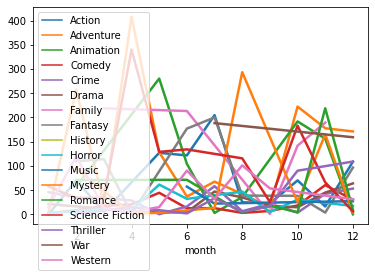

In [69]:
sns.lineplot(data=month_genre_gross_median, palette="tab10", linewidth=2.5, dashes=False)

In [70]:
month_genre_gross_median.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object', name='genres1')

In [73]:
month_genre_gross_median['5'].values

KeyError: '5'

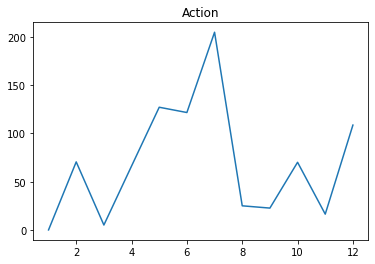

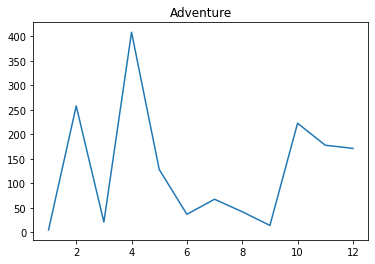

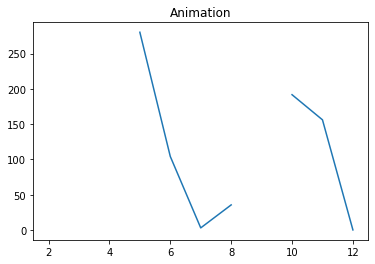

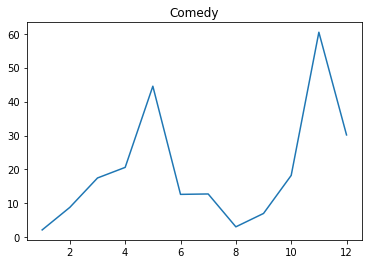

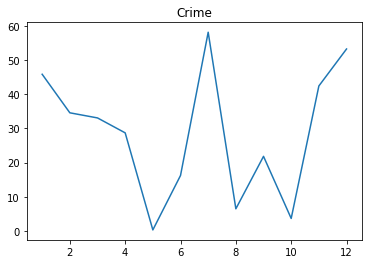

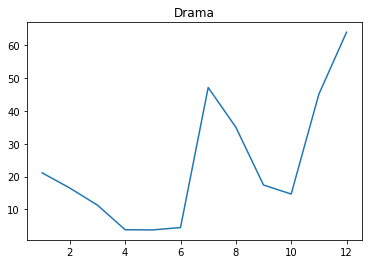

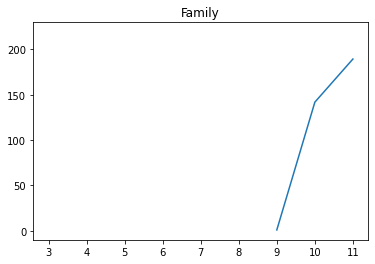

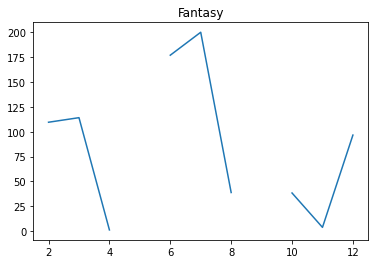

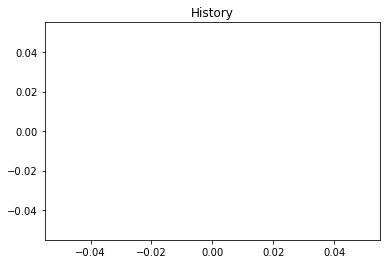

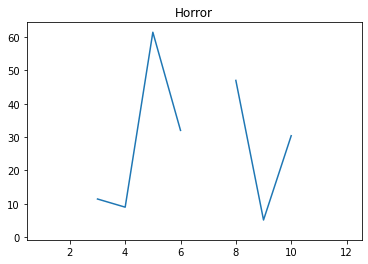

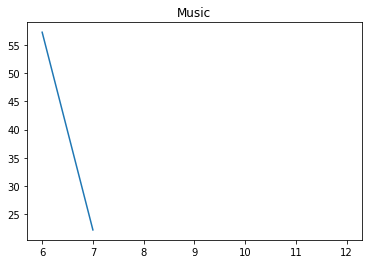

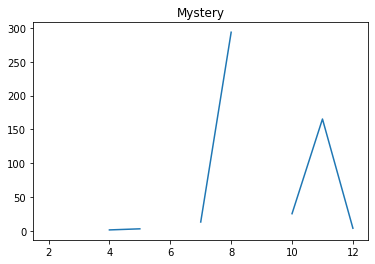

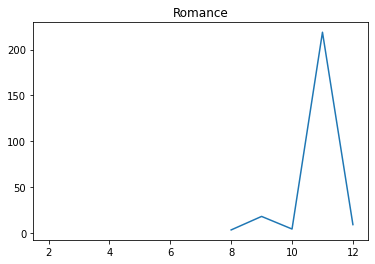

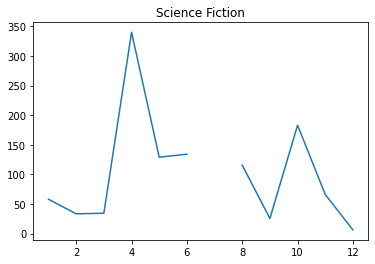

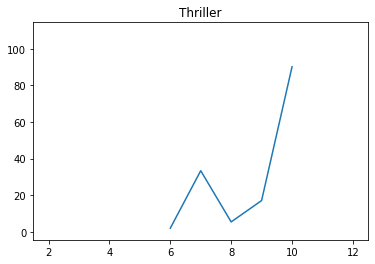

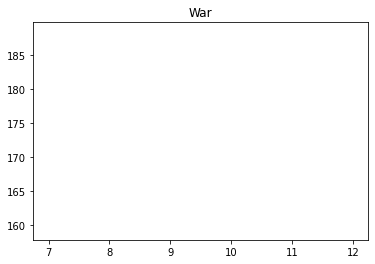

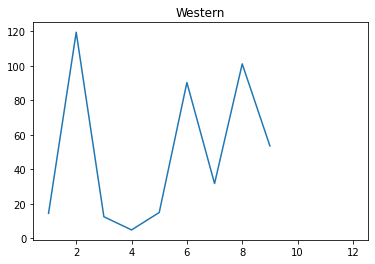

In [71]:
for col in month_genre_gross_median.columns:
    plt.plot(month_genre_gross_median.index, month_genre_gross_median[col].values)
    plt.title(col)
    plt.show()